---
---
# <div style="display: flex; justify-content: center">**Trustworty AI Homework**</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Topic:</span>
    <span>Esports analysis - Predicting round winning team in professional Counter Strike (thesis topic)</span>
</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Name:</span>
    <span>Patrik Peter Szmida</span>
</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Neptun:</span>
    <span style="margin-bottom: 15px;">G0HPLP</span>
</div>

---
---


# **II. Milestone: Model training and evaluation**

## II. I. Aim of milestone

In this milestone the main focus is on training both blackbox and whitebox models for the HLTV Counter Strike dataset. Evaluating the prediction results, while also trying to understand the reasoning behind it will also be important in this section.

## II. II. Changes in the data

Since this is my thesis project, I was continuously working on it throughout the semester, which involved extending the data that I already have with more informations that I can encapsulate in the graph. As a result of the updated preprocess flow, some of the original features form the previous milestone in the dataset were updated/renamed, plus new features were added. Some of these are new player-state describig boolean flags (for example whether a player is unknown, reloading, or has the bomb, etc.), others extend the palette of the players statistical descriptions: more detailed in-game statistics were added, as well as overall performance describing metrics. 

In the previous milestone, two datasets were analyzed: one was the graph datatset, the other was the player overall and Inferno map related statistical dataset. These two were analyzed separately due to a merge error that occured in the previous semester, leading to the corruption of the player overall statistical vaiables in the graphs. In this semester, this error was also fixed, resulting in a completed graph dataset with much wider variety of performance features. Another conclusion from th previous milestoine highlighted that using both the Inferno related and overall player metrics dataset would not be promising as these to have extremely high correlation; for this reason, I only included the overall metrics data in this semester's updated dataset. In this section the changes in the list of the features are listed.

### II. II. - 1. Updates in the feature set

In this section, the updates in the dataset are described, beginning with the description of the features: 
  - Renamed features will be shown with this convetion: ***old_name*** -> ***new_name***
  - New features are highlighted with <span style="font-style: italic; font-weight: bold; color: royalblue">blue</span> color
  - Deleted features are highlighted with <span style="font-style: italic; font-weight: bold; color: red">red</span> color
  - The overall statistical features added will not be included in this list since these were analyzed in the previous milestone as a separate dataset. This time it is included in the tabular graph representation dataset.

Player related features:

  - **x, y, z**: Coordinates of the player.
  - **hp**: Healt remaining. [100-0]
  - **armor**: Armor remaining. [100-0]
  - **flash_num** -> **flashGrenades**: Number of Flash Grenades of the player. [0-2]
  - **smoke_num** -> **smokeGrenades**: Number of Smoke Grenades of the player. [0-1]
  - **he_num** -> **heGrenades**: Number of High Explosive Grenades of the player. [0-1]
  - <span style="font-style: italic; font-weight: bold; color: royalblue">totalUtility</span>: A player's total number of grenades.
  - **isAlive**: Whether the player is alive in the actual secon of the round.
  
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isReloading</span>: Whether the player is reloading his weapon.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isBlinded</span>: Whether the player is blinded by a flash grenade.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isDucking</span>: Whether the player is crouching.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isDefusing</span>: Whether the player is defusing the bomb (only important for the defenders).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isPlanting</span>: Whether the player is planting the bomb (only important for the attackers).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isUnknown</span>: Whether the player's position is unknown to the enemy team.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isScoped</span>: Whether the player is scoped (when using a long range sniper rifle).
  - **equipment_value**: How expensive are the weapons and utility at the player are.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">equipmentValueRoundStart</span>: How expensive are the weapons and utility at the player were when the round begun.
  - **has_helmet**: Whether the player has a helmet (it is an extension to the armor: more expensive but gives additional protection to players)
  - **has_defuse**: Whether the player has a *defuse_kit* (only the CTs can have it, it's a tool for speedig up the defusing of the bomb, if it was planted)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">hasBomb</span>: Whether the player has the *bomb* (only relevant for attackers).
  - **kills** -> **stat_kills**: Number of successful eliminations done by the player in the examined *match*.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_HSK</span>: Number of headshot-kills.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_openKills</span>: Number of opening kills (first kill in the round).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_tradeKills</span>: Number of trade kills (a trade is when a player *A* gets eliminated by *X*, but then *A*'s teammate, *C*, eliminates *X* shortly after).
  - **deaths** -> **stat_deaths**: Number of deaths of the player in the examined *match*.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_openDeaths</span>: Number of opening deaths (when the player gets eliminated first from the round).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_assists</span>: Number of assists (when the player assists in a kill by causing damage to the opponent, but the finishing strike is struck by a teammate).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_flashAssists</span>: Number of times the player successfully blinded an opponent, resulting in a teammate killing that opponent.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_damage</span>: Total damage done by the player.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_weaponDamage</span>: Total damage done by the player by weapons.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_nadeDamage</span>: Total damage done by the player by nades.

  - **activeWeapon_*[weapon_name]***: Boolean flags that indicate which weapon the player is currently holding in his hands (some examples for *weapon_name*: AK-47, AWP, Smoke_Grenade, etc.).
  - **is_ct**: Whether the player is playing on the defending side.

Overall features:

  - **roundNum**: Shows in which round the snapshot was taken in
  - <span style="font-style: italic; font-weight: bold; color: red">team1AliveNum</span>: Number of players alive in the first team.  (Replaced with CT_aliveNum*)
  - <span style="font-style: italic; font-weight: bold; color: red">team2AliveNum</span>: Number of players alive in the second team. (Replaced with T_aliveNum*)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">CT_aliveNum</span>: Number of players alive on the CT side.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">T_aliveNum</span>: Number of players alive on the T side. 
  - **match_id**: Match ID
  - **t_score**: How many rounds the attackers (Ts) won so far in the match
  - **ct_score**: How many rounds the defenders (CTs) won so far in the match
  - **is_team1_ct**: Whether the first team is playing on the CT side currently
  - <span style="font-style: italic; font-weight: bold; color: red">team1_equipment_value</span>: Total equipment value of the first team. (Replaced with CT_equipmentValue*)
  - <span style="font-style: italic; font-weight: bold; color: red">team2_equipment_value</span>: Total equipment value of the second team. (Replaced with T_equipmentValue*)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">CT_equipmentValue</span>: Total value of equipment on the CT side.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">T_equipmentValue</span>: Total value of equipment on the T side.
  - <span style="font-style: italic; font-weight: bold; color: red">team1_total_grenade_num</span>: Number of grenades of the first team. (Removed)
  - <span style="font-style: italic; font-weight: bold; color: red">team2_total_grenade_num</span>: Number of grenades of the second team. (Removed)
  
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_being_planted,</span>: Boolean flag, whether the bomb is being planted at the moment.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_being_defused,</span>: Boolean flag, whether the bomb is being defused at the moment.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_defused,</span>: Boolean flag, whether the bomb is defused.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_planted_at_A_site,</span>: Boolean flag, whether the bomb is planted at A site.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_planted_at_B_site,</span>: Boolean flag, whether the bomb is planted at B site.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_X,</span>: Bomb X coorinate.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_Y,</span>: Bomb Y coorinate.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_Z,</span>: Bomb Z coorinate.
  - <span style="font-style: italic; font-weight: bold; color: red">seconds,</span>: Seconds, replaced with remaining time.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">time_remaining,</span>: Remaining time from the round.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">numerical_match_id,</span>: Four character long numerical match id.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos1,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos2,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos3,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos4,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos5,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos6,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos7,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos8,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos9</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).

  - **CTwinsRound** -> **CT_winsRound**: *Output variable*, shows whether the defenders win the round in the end.


*: These changes were necessary, since the output variable is ***CT_winsRound***, however, team1 can both be CT and T, depending on which half it is. For this reason I changed the meaning of these variables to this (These variables were analyzed in the previous milestone, I calculated them manually there as well, this time I just highlighted this change in the dataset)

The bombsite 3x3 matrices can be seen on the plot below (highlighted with black and white squares), plotted to the base graph of inferno.

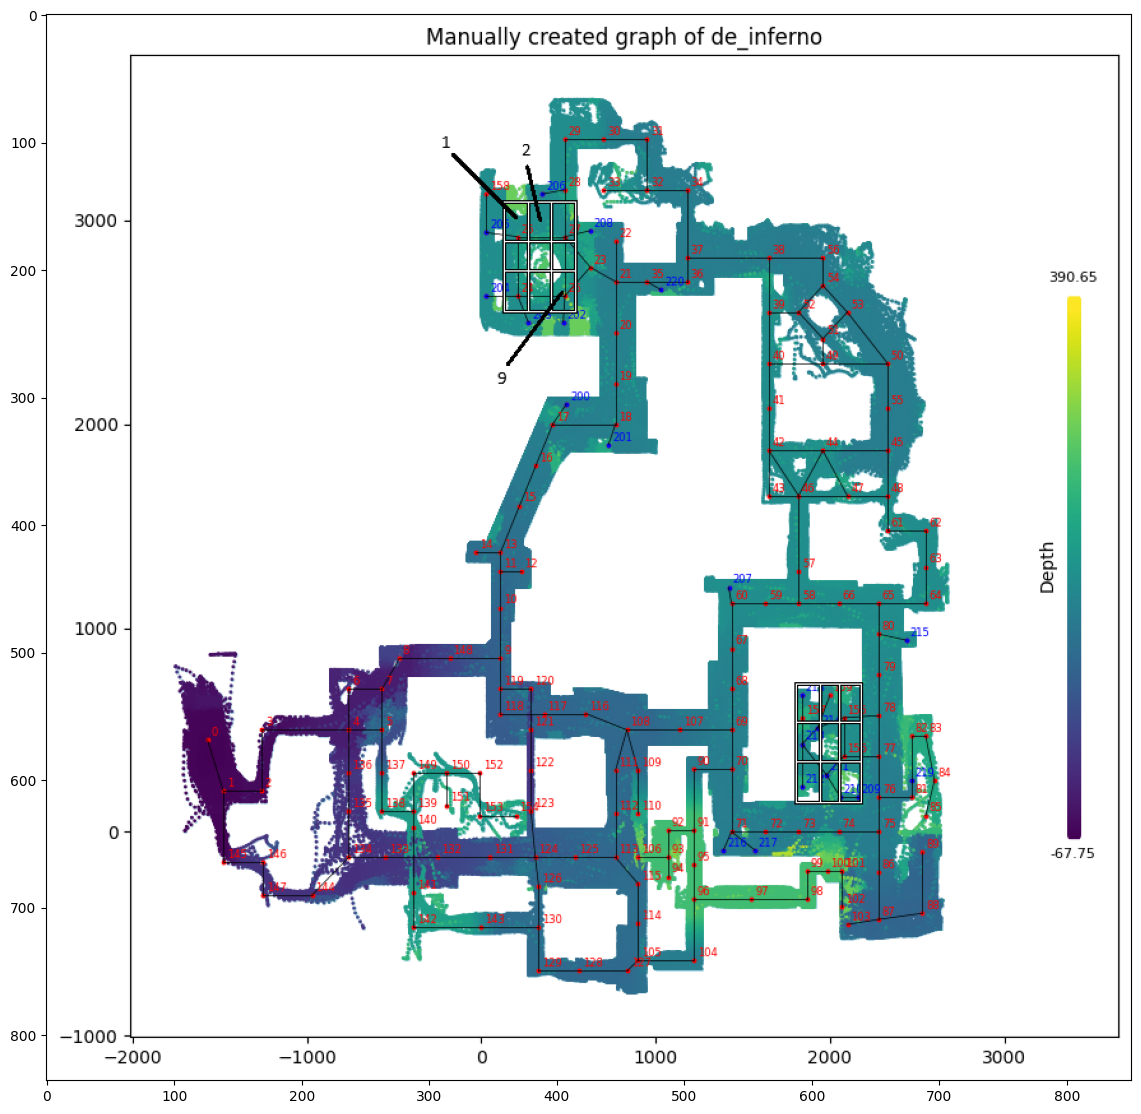

In [ ]:
fig = plt.figure(figsize=(14,14))
img = mpimg.imread('../data/inferno_graph/img/manual_v1_4_bombSite.png')
imgplot = plt.imshow(img)
plt.show()

### II. II. - 2. Dataset updates

The format of the dataset was updated as well. In a Drive link I provide the new tabular graph dataset (only part of it due to its size - after this semester's work I have ~ 700.000 graphs in these tabular datasets (overall 28 data files) with one csv containing around 25-30k rows, each of which represents one game moment graph). These datasets were also normalized during this semester, and the results are stored in separate files, also included in the Drive link. These normalized datasets were then used to create the heterogeneous graph dataset.


## 
#### *Imports*


In [94]:
# Torch
import torch
from torch_geometric.data import HeteroData, DataLoader, Dataset
from torch_geometric.nn import RGCNConv, global_mean_pool
from torch_geometric.nn import SAGEConv, to_hetero, GCNConv
from torch_geometric.nn import HeteroConv, GCNConv, SAGEConv, GATConv, GraphConv, Linear
from torch_geometric.nn import global_mean_pool
from torch_geometric.utils import trim_to_layer
from torch_geometric.loader import DataLoader

# Scipy and sklearn
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from pygam import LogisticGAM, s

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import matplotlib.image as mpimg
import seaborn as sns

# Data manipulation
import pandas as pd
import numpy as np

# Misc
from math import ceil, floor
import jupyter
import time
import os

pd.set_option('display.max_columns', 150)

# Path constants
PATH_GRAPH_DATA = '../data/graph-dataset/semester-2/hetero-graph/merged-32/'
PATH_MODELS = '../model/gnn/'


# Inferno dataset model
class InfernoDataset(Dataset):
    def __init__(self, data_list):
        super(InfernoDataset, self).__init__()
        self.data_list = data_list

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

## II. III. Whitebox models

In this sections, several whitebox models are trained on the normalized tabular dataset in order to predict whether the CTs will win the round based on the given game state or not. The tabular dataset is used in this part since (as far as I know) there aren't any "ordinary" whitebox models that are capable of training on graph structured data.

***Fundamental details***: Before the training of the whitebox models, in this section I describe my thesis task in greater detail than before, in order to explain the selected whitebox models for the predictions. My thesis objective is to examine game snapshots (in graph format) from professional Counter Strike matches and predict the round winning team in the actual round (CT - defender, or T - attacker side) based on the game state using graph neural networks. An important detail to highlight here is that although pushing the gnn to the best predictive performance is the primary focus in my thesis, the real task is not to predict the winner side, but rather the probabilities for each side. If I store the winning probabilities of a snapshot in a ranodm variable $X$, it can be seen that $X$ follows a *Bernoulli* distribution: 
$$
X \sim \text{Bernoulli}(p),
$$
where $p$ is the probability of the CT side winning the round, while $(1 - p)$ is the chance for the T side for success.

The reason for this is the desire for player action evaluation, an idea inspired from an article titled <a href="https://arxiv.org/pdf/2011.01324">Valuing Player Actions in Counter-Strike: Global Offensive</a>. In this work the authors used an XGBoost model on game snapshots represented in a tabular format to predict the round winning probability. Doing this prediction for whole rounds, and than visualizing the results (like for example in Fig. 4 of the article) reveals that the probability of winning fluctuates over time, depending on the actions of the players. Drawing inspiration form this idea, the aim of this thesis is to create an accurate GNN which can be used to predict winning probability throughout whole rounds (using the snapshots), and then examine fluctuations in the probabilities. An increase in a team's winning chance can be a result of a great action of a player from that team or a poor move from the opposing team; in the second part of the thesis I focus on reverse-engineering the fluctuations so that they can evaluate player actions.

> **Note**: The current GNN approach lacks an important factor, which is considering the time-series like nature of the data. This is an issue that I will address in my second semester of the thesis work (I was not able to get there this semester unfortunately) by extending the gnn structure to be able to account for this; essentially, the plan is to use heterogeneous temporal graph network for the final predictions.

For the reasons mentioned above, I only test whitebox models in this part that are capable of predicting probabilities instead of labels, as this is the main objective of my task.

### **1. Logistic Regression**

#### *Import and format data*

Import the normalized tabular datasets and delete not needed columns (such as player names, match_id, etc).

In [26]:
df_og = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_1.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely yield a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(2, 9):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    df_og = pd.concat([df_og, temp])

In [27]:
df = df_og.copy()

df = df.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                      'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                      'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

# Save feature order
feature_order = df.columns

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=['CT_winsRound']).fillna(0)
y = df['CT_winsRound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### *Training Logistic Regression*

Train the Logistic Regression model and check feature coefficients.

Training loss: 0.342659
Accuracy: 0.740927
Precision: 0.721956
Recall: 0.643781
F1: 0.680631
ROC AUC: 0.821007


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\2709059147.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


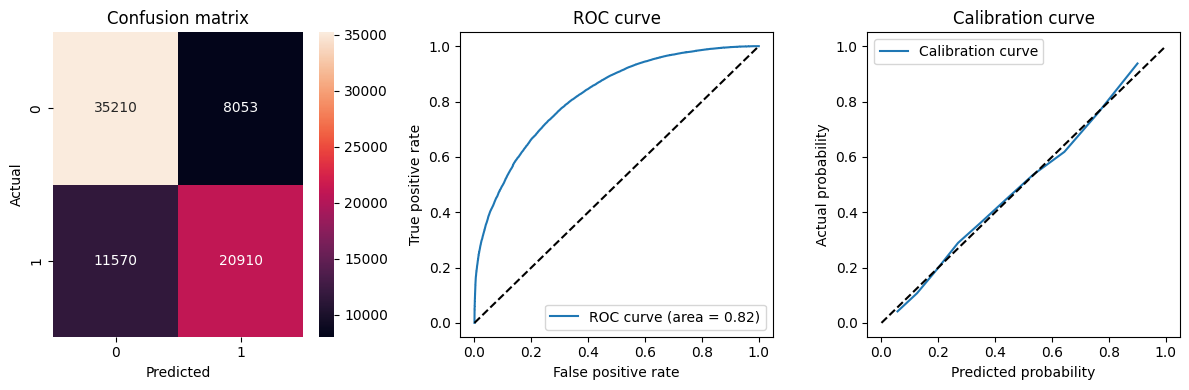

In [28]:
model = LogisticRegression(random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict probability estimates for ROC AUC and ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_proba))
precision = precision_score(y_test, np.round(y_proba))
recall = recall_score(y_test, np.round(y_proba))
f1 = f1_score(y_test, np.round(y_proba))
conf_matrix = confusion_matrix(y_test, np.round(y_proba))
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
loss = np.mean(np.abs(y_test - y_proba))

# Print metrics
print("Training loss: {:.6f}".format(loss))
print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1: {:.6f}".format(f1))
print("ROC AUC: {:.6f}".format(roc_auc))

# Plot confusion matrix and ROC curve
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC curve
axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend()

# Model calibration
calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
calibration['bucket'] = pd.qcut(calibration['predicted'], 10)
calibration = calibration.groupby('bucket').mean().reset_index()

axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title("Calibration curve")
axs[2].set_xlabel("Predicted probability")
axs[2].set_ylabel("Actual probability")
axs[2].legend()

plt.tight_layout()
plt.show()

**Results:** Looking at the training results at first, they seem quite good. The accuracy is atound 75%, AUC is 0.82 and the other metrics like precision, recall or f1 score are acceptable/good as well. Another positive factor is that the calibration plot shows that the model is not overfitting in the sense that it predicts extremely high (e.g. 0.993) values for positive and extremely low (e.g. 0.0023) probabilitied for zero labels. For a detailed understanding of the model I plotted some important feature's coefficients below.

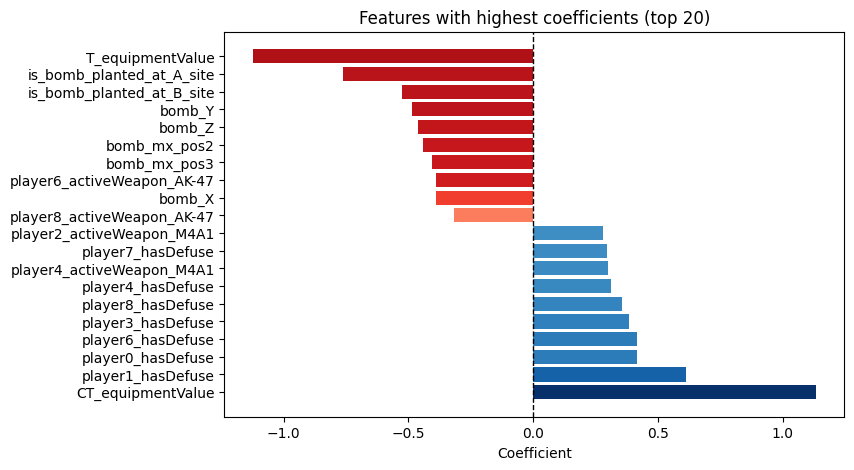

In [29]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1).head(50)

pos_feature_names = feature_coefficients['Feature_pos'].iloc[:10].values
neg_feature_names = feature_coefficients['Feature_neg'].iloc[:10].values

pos_feature_coef = []
neg_feature_coef = []

for idx in range(0,10):
    pos_feature_coef.append(feature_coefficients['Importance_pos'].iloc[idx][0])
    neg_feature_coef.append(feature_coefficients['Importance_neg'].iloc[idx][0])


# Plot
pos_cmap = plt.cm.Blues
neg_cmap = plt.cm.Reds  

norm_pos = Normalize(-1, 1)
norm_neg = Normalize(-2, 0)

all_features = np.concatenate([neg_feature_names, pos_feature_names[::-1]])
all_coef = np.concatenate([neg_feature_coef, pos_feature_coef[::-1]])

pos_colors = [pos_cmap(norm_pos(coef)) for coef in pos_feature_coef][::-1]
neg_colors = [neg_cmap(norm_neg(coef)) for coef in neg_feature_coef]
all_colors = np.concatenate([neg_colors[::-1], pos_colors])

fig, axs = plt.subplots(figsize=(8, 5))
axs.barh(all_features, all_coef, color=all_colors)

axs.axvline(x=0, color='black', linestyle='dashed', linewidth=1)

axs.set_xlabel('Coefficient')
axs.set_title('Features with highest coefficients (top 20)')
axs.invert_yaxis()

plt.show()

**Analyzing coefficients**: Looking at the first plot, the most important features and their coefficients are quite intuitive at first glance. The rounds where the defending CT side wins are labeled 1, a Terrorist win is labeled 0; thus, it is not suprising to see the key features related to the CT-s in this plot are positive, while strong T-side related columns have negative impact on the outcome. The features with the highest coefficient values are by far the *CT_equipmentValue* and *T_equipmentValue*. The reason for this is that these columns hold powerful information for the prediction, as these values contain information about both the alive number of players, as well as their weaponry and utilities:

$CT/T\_equipmentValue = \sum_{i=1}^{5} player_iHealth \cdot player_iEquipmentValue $.

Other features from this '20 highest coefficient list' are also intuitive and easy to explain: on the T side, other important factors the model considers are bomb related informations. This can be seen by examining that the 2nd and 3rd most important T features are whether the bomb is planted on either bombsites. Following these two there are bomb position related columns that the model considers important: *bomb_X*, *bomb_Y*, *bomb_Z*, *bomb_mx_pos_2* and *bomb_mx_pos_3*. The leftover columns are examining the weapons of the players; the AK47 is the best T side rifle available, so it is also easy to explain why the model chose it as an important feature.

In the case of the CTs, similaar can be said but from a different point of view. The most important CT features (besides the *CT_equipmentValue*) are whether the players have defuse kits or not. This device shortens down the defusal time of the bomb from 10 to 5 second; a valuable 5 seconds, considering that after a bomb plant, the CTs have only 40 seconds to eliminate the explosion threat. It is understandable, that the model chose these features as really important. The leftover features here are also related to weapons, and similarly to the T side's AK47, M4A1 is the CT side's best rifle.

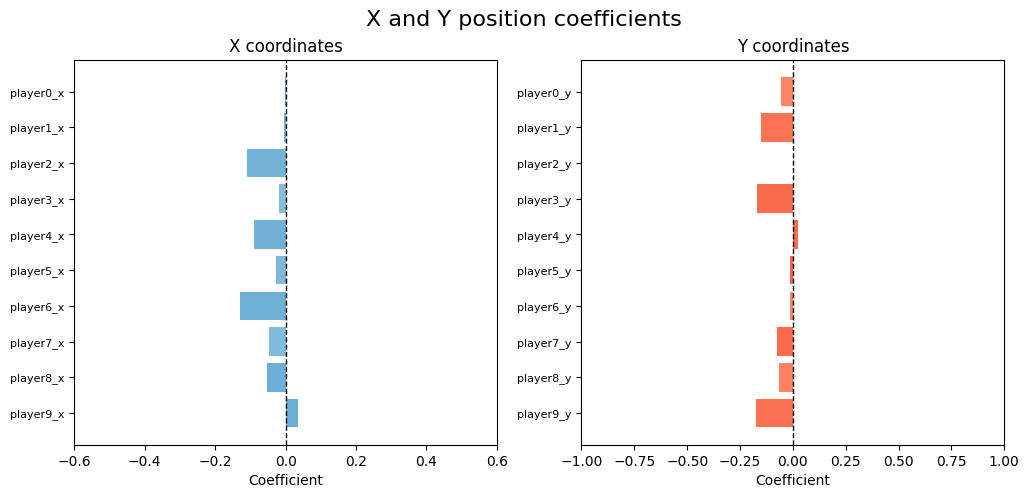

In [30]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

x_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_x')].sort_values(by=['Feature_pos'])['Feature_pos']
y_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_y')].sort_values(by=['Feature_pos'])['Feature_pos']

x_feature_coef = []
y_feature_coef = []

x_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_x')]
y_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_y')]

for idx in range(0,10):
    x_feature_coef.append(x_data['Importance_pos'].iloc[idx][0])
    y_feature_coef.append(y_data['Importance_pos'].iloc[idx][0])


# Plot
x_cmap = plt.cm.Blues
y_cmap = plt.cm.Reds

norm_x = Normalize(-1, 1)
norm_y = Normalize(-1, 1)

x_colors = [x_cmap(norm_x(coef)) for coef in x_feature_coef][::-1]
y_colors = [y_cmap(norm_y(coef)) for coef in y_feature_coef][::-1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('X and Y position coefficients', fontsize=16)

axs[0].barh(x_feature_names, x_feature_coef, color=x_colors)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(x_feature_names, x_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('X coordinates')
axs[0].invert_yaxis()
axs[0].set_xlim(-0.6, 0.6)

axs[1].barh(y_feature_names, y_feature_coef, color=y_colors)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(y_feature_names, y_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('Y coordinates')
axs[1].invert_yaxis()
axs[1].set_xlim(-1, 1)

plt.show()

**Analyzing coefficients**: This plot visualizes the positional related feature coefficients. It is clearly visible from the bar plot that the model essentially ignores the positional related features (highest coefficient value is for <span style="font-style: italic; font-weight: bold; color: #F08080">player9_y</span> ~ 0.18, while the most important features have a value of ~ ±1.2)

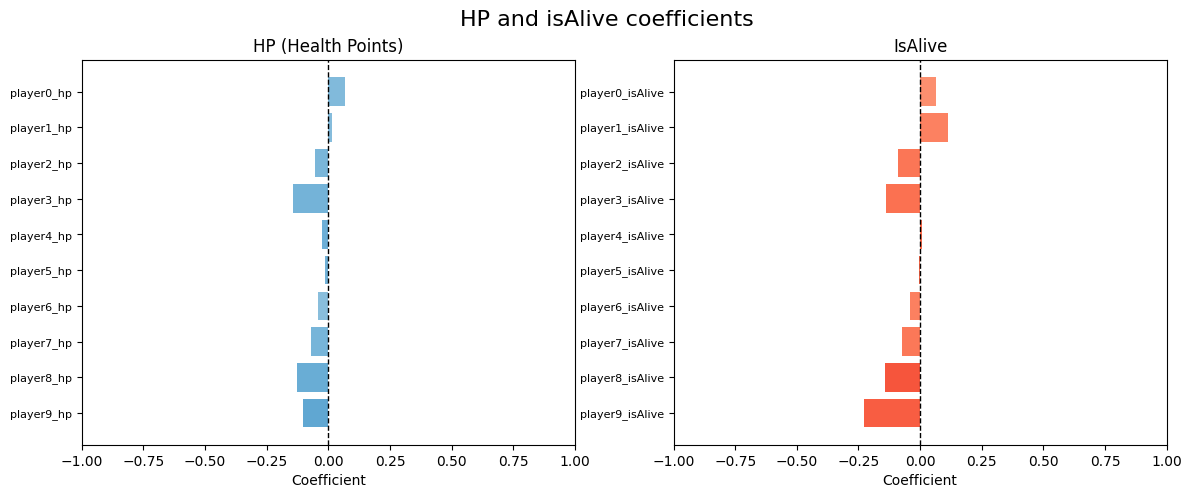

In [32]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

x_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')].sort_values(by=['Feature_pos'])['Feature_pos']
y_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_hp')].sort_values(by=['Feature_pos'])['Feature_pos']

x_feature_coef = []
y_feature_coef = []

x_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')]
y_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_hp')]

for idx in range(0,10):
    x_feature_coef.append(x_data['Importance_pos'].iloc[idx][0])
    y_feature_coef.append(y_data['Importance_pos'].iloc[idx][0])


# Plot
x_cmap = plt.cm.Reds
y_cmap = plt.cm.Blues

norm_x = Normalize(-1, 1)
norm_y = Normalize(-1, 1)

x_colors = [x_cmap(norm_x(coef)) for coef in x_feature_coef][::-1]
y_colors = [y_cmap(norm_y(coef)) for coef in y_feature_coef][::-1]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('HP and isAlive coefficients', fontsize=16)

axs[0].barh(y_feature_names, y_feature_coef, color=y_colors)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(y_feature_names, y_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('HP (Health Points)')
axs[0].invert_yaxis()
axs[0].set_xlim(-1, 1)

axs[1].barh(x_feature_names, x_feature_coef, color=x_colors)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(x_feature_names, x_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('IsAlive')
axs[1].invert_yaxis()
axs[1].set_xlim(-1, 1)

plt.show()

**Analyzing coefficients**: Similar can be said for the *isAlive* and *HP* features as to the positional features: the model barely uses these values for prediction. This is understandable in the case if *isAlive*, since the information of these columns are already present in *CT/T_equipmentValue*, which the model already considers the most important features. However, the remaining health on the palyers is also a crutial, yet very intuitive part of the game when predicting round winners. There are often scenarios where HP matters more than the number of players alive. For example, lets say in a 4v3 situation (4 - CTs, 3 - Ts) at first glance, it can be intuitive that the CTs are more likely to win the round since they have a man advantage; however, if 2 of the 4 CT players have low health (under 20 or 30) due to previous fights, but the T-s all have full health, than it is the Ts that are more likely to win the round. The reason for this is because the CT-s have to protect both bombsites in the game, which (in these cases) they commonly hold in a 2-2 setup. Since half of the CT-s are close to death, the attackers have a much higher chance to get into a bombsite since it is a 3v2, essentially a 3v1.5 situation. Usually a bomb plant with low HP CT players results in a weapon save for the next round, meaning that the example 4v3 is a highly benefitial situation for the T side. The model, however, does not consider these columns important.

#### *Testing the model*

Testing the model on previously unseen data.

In [ ]:
test = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_21.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely leed to a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(22, 26):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    test = pd.concat([test, temp])

test = test.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                          'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                          'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

Test loss: 0.37
Accuracy: 0.70
Precision: 0.64
Recall: 0.72
F1: 0.68
ROC AUC: 0.70


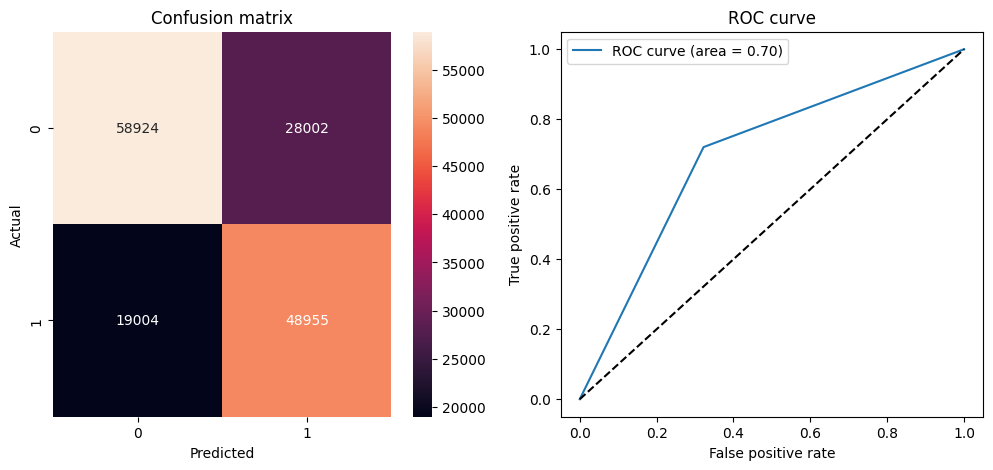

In [ ]:
test_X = test.drop(columns=['CT_winsRound']).fillna(0)
test_y = test['CT_winsRound']

test_y_pred = model.predict_proba(test_X)[:, 1]

test_accuracy = accuracy_score(test_y, np.round(test_y_pred))
test_precision = precision_score(test_y, np.round(test_y_pred))
test_recall = recall_score(test_y, np.round(test_y_pred))
test_f1 = f1_score(test_y, np.round(test_y_pred))
test_conf_matrix = confusion_matrix(test_y, np.round(test_y_pred))
test_roc_auc = roc_auc_score(test_y, np.round(test_y_pred))
test_fpr, test_tpr, _ = roc_curve(test_y, np.round(test_y_pred))
test_roc_auc = auc(test_fpr, test_tpr)
test_loss = np.mean(np.abs(test_y - test_y_pred))

print("Test loss: {:.2f}".format(test_loss))
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1: {:.2f}".format(test_f1))
print("ROC AUC: {:.2f}".format(test_roc_auc))

fig, axs = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[1].plot(test_fpr, test_tpr, label='ROC curve (area = {:.2f})'.format(test_roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend();



**Results:** The models seems to generalize well on previously unseen data. Although the AUC value decreases compared to the training results, the accuracy and the other metrics are absolutely in the acceptably range.

##### ***Logistic Regression: Conclusion***

The overall results of the Logistic Regression model seems generally good and begs the question: why are GNN-s needed for this task, if simple linear models can achieve great results. The answer for that is yes, the Logistic Regression model did achieve great results, however, the model is barely, if better than a human's intuition. To prove this, lets look at a football example: team *A* plays a match againts team *B*. If team *A* is a team that won last year's championship, while team *B* is a newcomer who barely made it to this league, it is common intuition to think that team *A* has a huge advantage and is more likely to win the match. Similarly in Counter Strike (CS), if a team has more players alive and/or better weaponry (*CT/T_equipmentValue* features), they are more likely to win in most cases. Continuing on this path, if we look at the football game, and we see that team *A* has a lead of 3-0, it is also senseble to say that team *A* is likely to win, which will be right in most cases. In CS, a similar case is how the logistic regression considers important the bomb-related features on both sides (T: whether the bomb is planted, and if yes, where; CT: number of defuse kits); if the T side planted the bomb, in many cases that gives them a huge advantage, making them more likely to win; however, if the CTs have defuse kits, they have more chance of winning the round as well. Similarly how in football a 3-0 lead is a huge advantage, but a 2-1 is feasable. 

In conclusion, the problem with this model is not the results, but the way how it predicted those results. It can successfully learn the most important factors about the game that are pretty intuitive, however, it lacks the power to capture more advanced factors like positional lineups; similarly how in football, a not competent person doesn't know anything about lineups. This model can perform on an intuitive level, but no further (which would be the aim of this project).

### **2. Logistic GAM**

#### *Import and format data*

Import the normalized tabular datasets and delete not needed columns (such as player names, match_id, etc).

In [112]:
df_og = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_1.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely leed to a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(2, 9):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    df_og = pd.concat([df_og, temp])

In [113]:
df = df_og.copy()

df = df.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                      'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                      'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

# Save feature order
feature_order = df.columns

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=['CT_winsRound']).fillna(0)
y = df['CT_winsRound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### *Training Logistic GAM*

Train the Logistic Regression model and check feature coefficients.

Training loss: 0.4719
Accuracy: 0.5873
Precision: 0.5363
Recall: 0.2783
F1: 0.3664
ROC AUC: 0.6108


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\2569746215.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


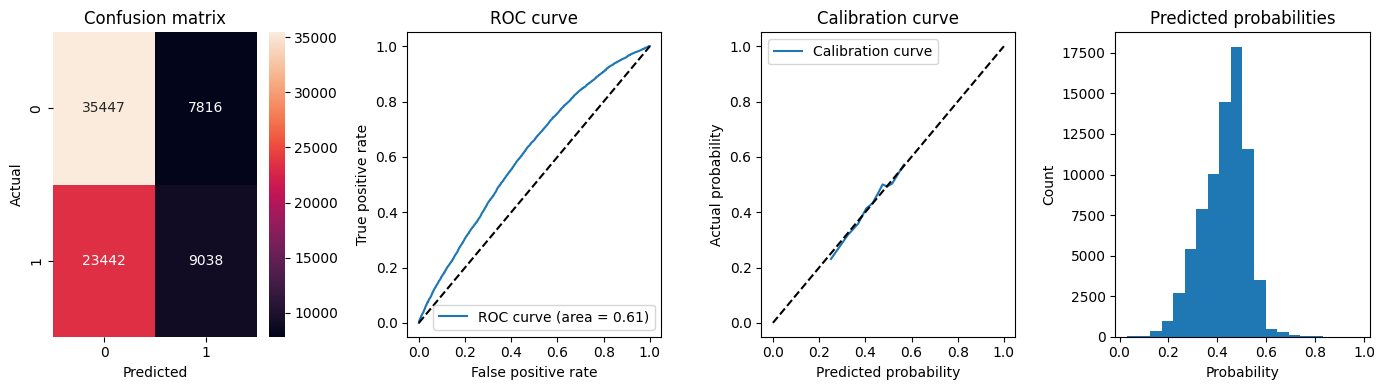

In [121]:
model = LogisticGAM(s(0) + s(1) + s(2) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
model.fit(X_train, y_train)

# Predict probability estimates for ROC AUC and ROC curve
y_proba = model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_proba))
precision = precision_score(y_test, np.round(y_proba))
recall = recall_score(y_test, np.round(y_proba))
f1 = f1_score(y_test, np.round(y_proba))
conf_matrix = confusion_matrix(y_test, np.round(y_proba))
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
loss = np.mean(np.abs(y_test - y_proba))

# Print metrics
print("Training loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))

# Plot confusion matrix and ROC curve
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC curve
axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend()

# Model calibration
calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
calibration['bucket'] = pd.qcut(calibration['predicted'], 10)
calibration = calibration.groupby('bucket').mean().reset_index()

axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title("Calibration curve")
axs[2].set_xlabel("Predicted probability")
axs[2].set_ylabel("Actual probability")
axs[2].legend()

axs[3].hist(y_proba, bins=20)
axs[3].set_title("Predicted probabilities")
axs[3].set_xlabel("Probability")
axs[3].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Results:** These results are not as promising as they were in the case of the Logistic Regression. The models predictive capabilities are poor, highlighted by the low accuracy, precision and f1 score. Also the model is not calibrated well since most of the probabilities that it predicts are around 0.5. The 4th plot shows that the distribution of the predicted probabilities can be described really well with a Gaussian - which further shows that the model is unsure about the predictions.

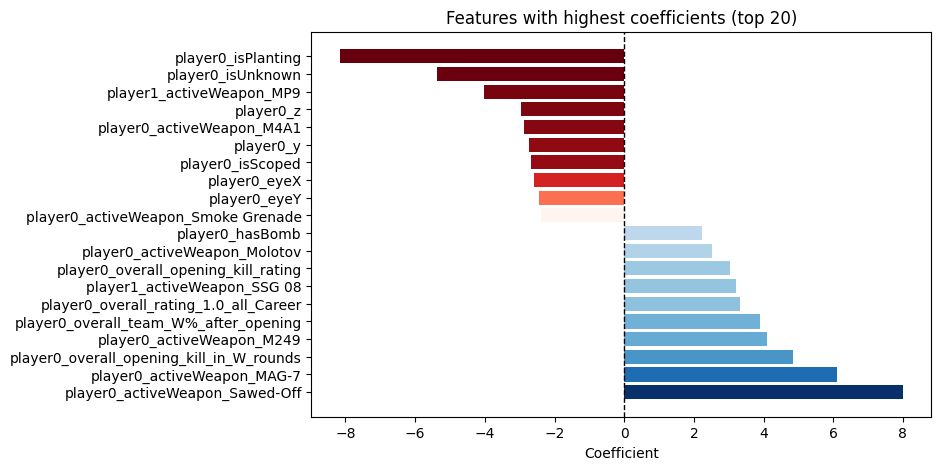

In [117]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1).head(50)

pos_feature_names = feature_coefficients['Feature_pos'].iloc[:10].values
neg_feature_names = feature_coefficients['Feature_neg'].iloc[:10].values

pos_feature_coef = []
neg_feature_coef = []

for idx in range(0,10):
    pos_feature_coef.append(feature_coefficients['Importance_pos'].iloc[idx])
    neg_feature_coef.append(feature_coefficients['Importance_neg'].iloc[idx])


# Plot
pos_cmap = plt.cm.Blues
neg_cmap = plt.cm.Reds  

norm_pos = Normalize(min(pos_feature_coef) - min(pos_feature_coef), max(pos_feature_coef))
norm_neg = Normalize(min(neg_feature_coef), max(neg_feature_coef))

all_features = np.concatenate([neg_feature_names, pos_feature_names[::-1]])
all_coef = np.concatenate([neg_feature_coef, pos_feature_coef[::-1]])

pos_colors = [pos_cmap(norm_pos(coef)) for coef in pos_feature_coef][::-1]
neg_colors = [neg_cmap(norm_neg(coef)) for coef in neg_feature_coef]
all_colors = np.concatenate([neg_colors[::-1], pos_colors])

fig, axs = plt.subplots(figsize=(8, 5))
axs.barh(all_features, all_coef, color=all_colors)

axs.axvline(x=0, color='black', linestyle='dashed', linewidth=1)

axs.set_xlabel('Coefficient')
axs.set_title('Features with highest coefficients (top 20)')
axs.invert_yaxis()

plt.show()

**Analyzing coefficients**: Unlike in the case of Logistic Regression, important and intuitive features does not show up with high coefficients. The model fails to capture these. It looks like it is trying to figure out patterns using the player values but it fails to do it with high predictive accuracy.

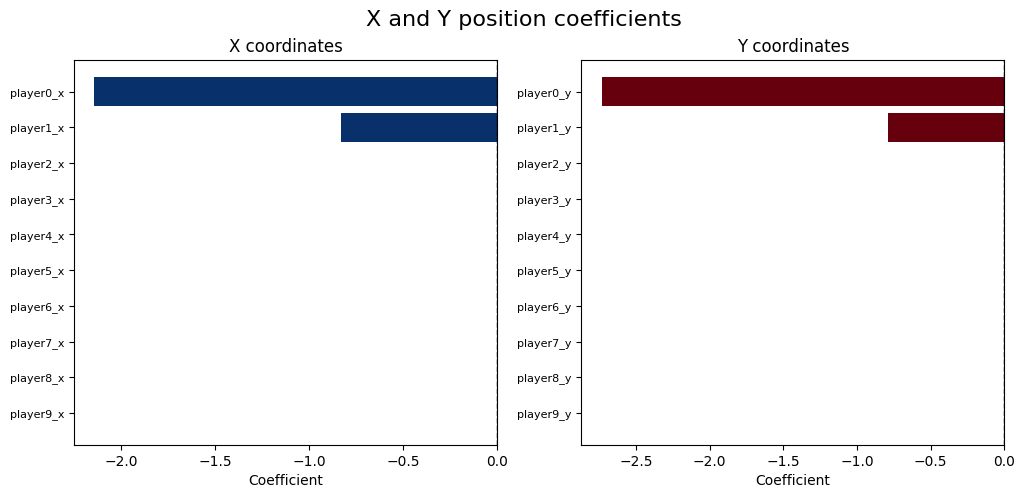

In [119]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

x_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_x')].sort_values(by=['Feature_pos'])['Feature_pos']
y_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_y')].sort_values(by=['Feature_pos'])['Feature_pos']

x_feature_coef = []
y_feature_coef = []

x_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_x')]
y_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_y')]

for idx in range(0,10):
    x_feature_coef.append(x_data['Importance_pos'].iloc[idx])
    y_feature_coef.append(y_data['Importance_pos'].iloc[idx])


# Replace NaN values with 0
x_feature_coef = [0 if coef == None else coef for coef in x_feature_coef]
y_feature_coef = [0 if coef == None else coef for coef in y_feature_coef]

# Plot
x_cmap = plt.cm.Blues
y_cmap = plt.cm.Reds

norm_x = Normalize(min(x_feature_coef), max(x_feature_coef))
norm_y = Normalize(min(y_feature_coef), max(y_feature_coef))

x_colors = [x_cmap(norm_x(coef)) for coef in x_feature_coef][::-1]
y_colors = [y_cmap(norm_y(coef)) for coef in y_feature_coef][::-1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('X and Y position coefficients', fontsize=16)

axs[0].barh(x_feature_names, x_feature_coef, color=x_colors)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(x_feature_names, x_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('X coordinates')
axs[0].invert_yaxis()

axs[1].barh(y_feature_names, y_feature_coef, color=y_colors)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(y_feature_names, y_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('Y coordinates')
axs[1].invert_yaxis()

plt.show()

**Analyzing coefficients**: This model is also almost completely ignorant of the player positions. Only the <span style="font-style: italic; font-weight: bold; color: #F08080">player0_x</span> and <span style="font-style: italic; font-weight: bold; color: #F08080">player1_x</span> values have some effect on the outcome, which further implies that the model is unable to effectively learn player related features.

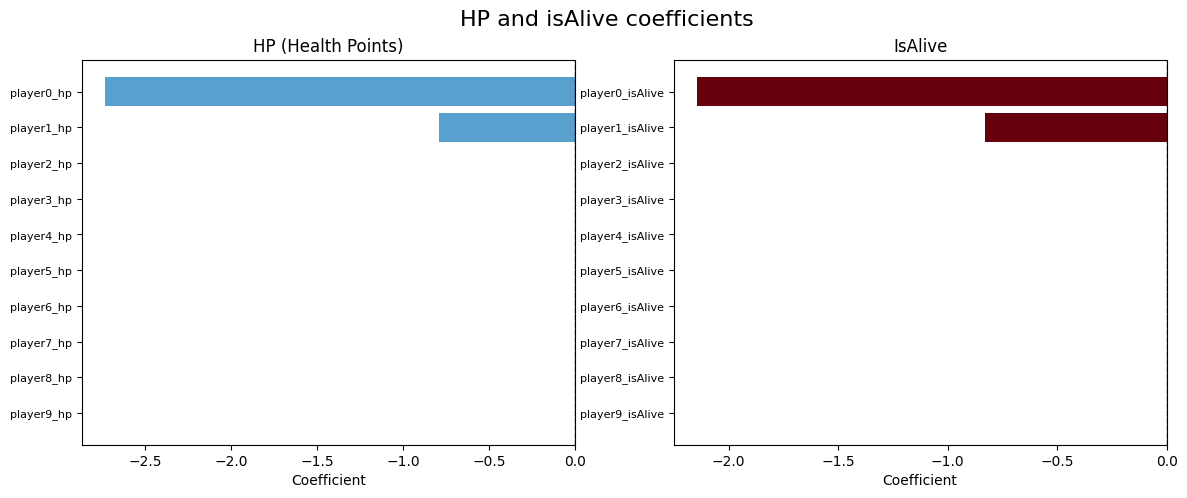

In [120]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

isAlive_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')].sort_values(by=['Feature_pos'])['Feature_pos']
hp_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_hp')].sort_values(by=['Feature_pos'])['Feature_pos']

isAlive_feature_coef = []
hp_feature_coef = []

isAlive_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')]
hp_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_hp')]

for idx in range(0,10):
    isAlive_feature_coef.append(x_data['Importance_pos'].iloc[idx])
    hp_feature_coef.append(y_data['Importance_pos'].iloc[idx])

# Replace NaN values with 0
isAlive_feature_coef = [0 if coef == None else coef for coef in x_feature_coef]
hp_feature_coef = [0 if coef == None else coef for coef in y_feature_coef]

# Plot
isAlive_cmap = plt.cm.Reds
hp_cmap = plt.cm.Blues

norm_isAlive = Normalize(min(isAlive_feature_coef), max(isAlive_feature_coef))
norm_hp = Normalize(-5, 4)

isAlive_colors = [isAlive_cmap(norm_isAlive(coef)) for coef in isAlive_feature_coef][::-1]
hp_colors = [hp_cmap(norm_hp(coef)) for coef in hp_feature_coef][::-1]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('HP and isAlive coefficients', fontsize=16)

axs[0].barh(hp_feature_names, hp_feature_coef, color=hp_colors)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(hp_feature_names, hp_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('HP (Health Points)')
axs[0].invert_yaxis()

axs[1].barh(isAlive_feature_names, isAlive_feature_coef, color=isAlive_colors)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(isAlive_feature_names, isAlive_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('IsAlive')
axs[1].invert_yaxis()

plt.show()

**Analyzing coefficients**: Similarly, only <span style="font-style: italic; font-weight: bold; color: #F08080">player0_hp/isAlive</span> and <span style="font-style: italic; font-weight: bold; color: #F08080">player1_hp/isAlive</span> values are considered in the prediction, which further shows that the model is unable to handle players well.

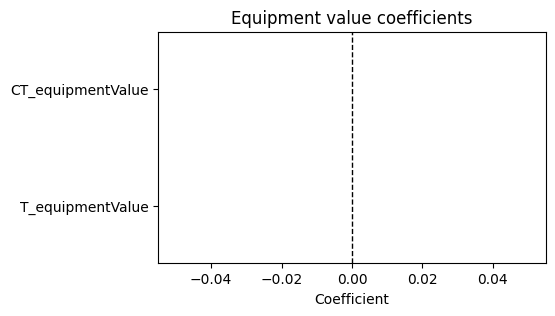

In [134]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

equip_val = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('T_equipmentValue')][['Feature_pos', 'Importance_pos']]
equip_val['Importance_pos'] = equip_val['Importance_pos'].apply(lambda x: x if x != None else 0)

# Plot
fig, axs = plt.subplots(figsize=(5, 3))
axs.barh(equip_val['Feature_pos'], equip_val['Importance_pos'], color='blue')
axs.axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs.set_xlabel('Coefficient')
axs.set_title('Equipment value coefficients')
axs.invert_yaxis()

**Analyzing coefficients**: Another indicator that the model is not usable that it completely ignores the *CT/T_equipmentValue* features.

#### *Testing the model*

Testing the model on previously unseen data.

In [135]:
test = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_21.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely leed to a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(22, 26):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    test = pd.concat([test, temp])

test = test.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                          'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                          'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

Test loss: 0.48
Accuracy: 0.56
Precision: 0.50
Recall: 0.28
F1: 0.36
ROC AUC: 0.53


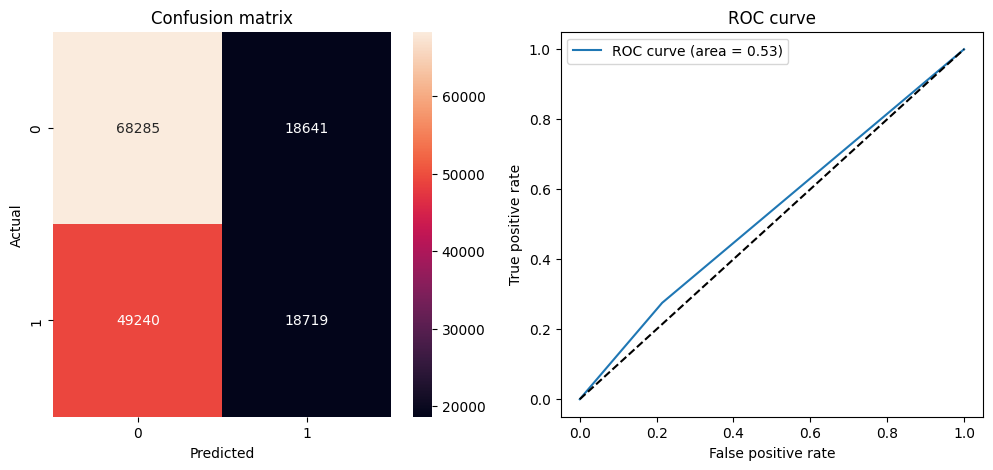

In [136]:
test_X = test.drop(columns=['CT_winsRound']).fillna(0)
test_y = test['CT_winsRound']

test_y_pred = model.predict_proba(test_X)

test_accuracy = accuracy_score(test_y, np.round(test_y_pred))
test_precision = precision_score(test_y, np.round(test_y_pred))
test_recall = recall_score(test_y, np.round(test_y_pred))
test_f1 = f1_score(test_y, np.round(test_y_pred))
test_conf_matrix = confusion_matrix(test_y, np.round(test_y_pred))
test_roc_auc = roc_auc_score(test_y, np.round(test_y_pred))
test_fpr, test_tpr, _ = roc_curve(test_y, np.round(test_y_pred))
test_roc_auc = auc(test_fpr, test_tpr)
test_loss = np.mean(np.abs(test_y - test_y_pred))

print("Test loss: {:.2f}".format(test_loss))
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1: {:.2f}".format(test_f1))
print("ROC AUC: {:.2f}".format(test_roc_auc))

fig, axs = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[1].plot(test_fpr, test_tpr, label='ROC curve (area = {:.2f})'.format(test_roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend();



**Results:** Previously it was visible that the model fails to learn valuable information; the test results confirm this, as they are just slightly better than a random 50-50 prediction.

##### ***GAM: Conclusion***

Unlike the Logistic Regression model, the used GAM estimation fails to capture the key, yet most intuitive aspects of the game. It seems as if it were trying to learn non-trivial, underlying connections between the predictive variables and the output variable, but fails to do so, which van be seen on the poor performances on both the training and the test sets.

### **3. Decision tree**

#### *Import and format data*

In [3]:
df_og = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_1.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely leed to a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(2, 9):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    df_og = pd.concat([df_og, temp])

In [4]:
df = df_og.copy()

df = df.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                      'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                      'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

# Save feature order
feature_order = df.columns

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=['CT_winsRound']).fillna(0)
y = df['CT_winsRound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### *Train Decision Tree*

Training loss: 0.3298
Accuracy: 0.7555
Precision: 0.7562
Recall: 0.7159
F1: 0.7355
ROC AUC: 0.8268


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\4115213507.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


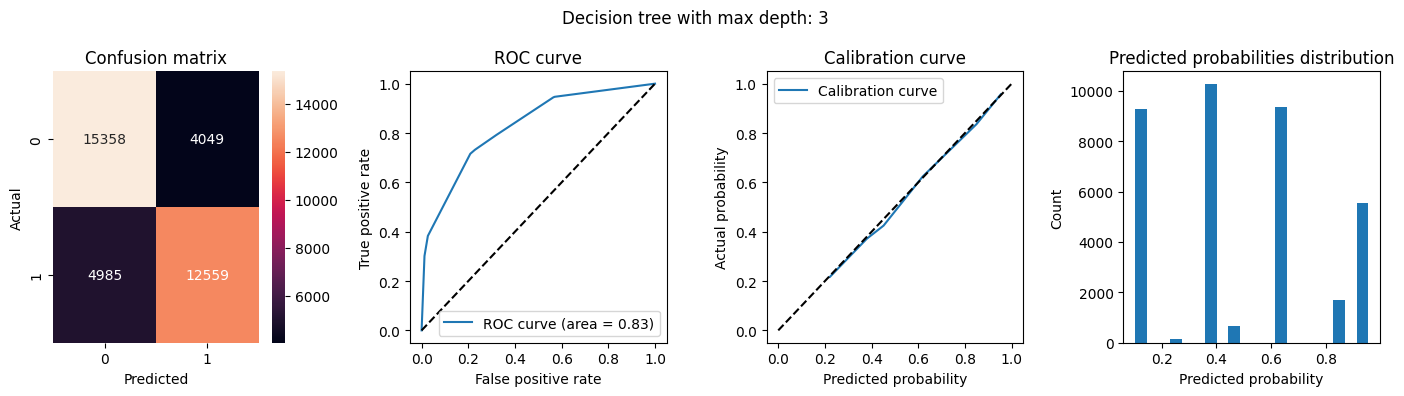

Training loss: 0.2910
Accuracy: 0.7988
Precision: 0.8210
Recall: 0.7371
F1: 0.7768
ROC AUC: 0.8661


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\4115213507.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


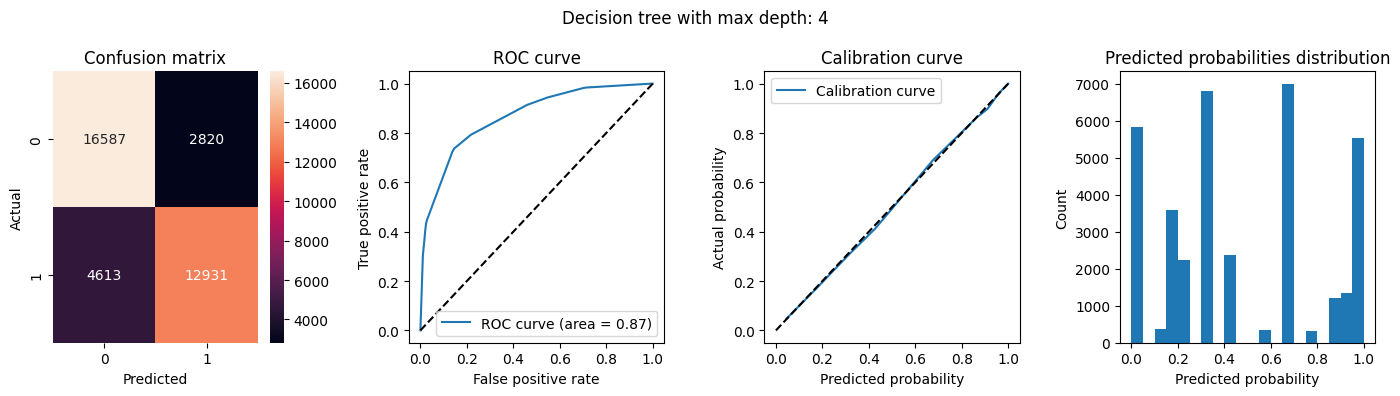

Training loss: 0.2495
Accuracy: 0.8236
Precision: 0.8312
Recall: 0.7885
F1: 0.8093
ROC AUC: 0.9016


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\4115213507.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


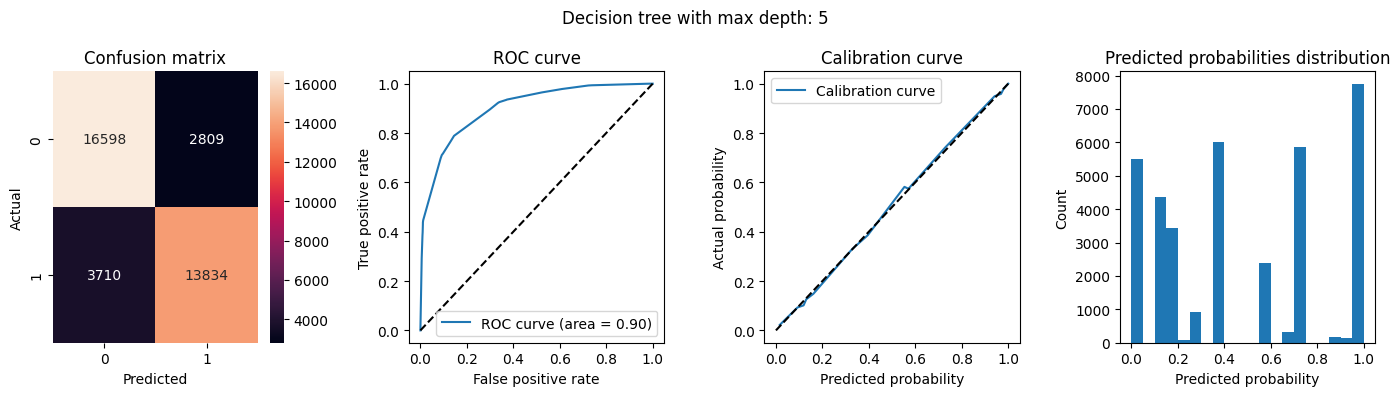

Training loss: 0.1969
Accuracy: 0.8619
Precision: 0.8750
Recall: 0.8274
F1: 0.8505
ROC AUC: 0.9377


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\4115213507.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


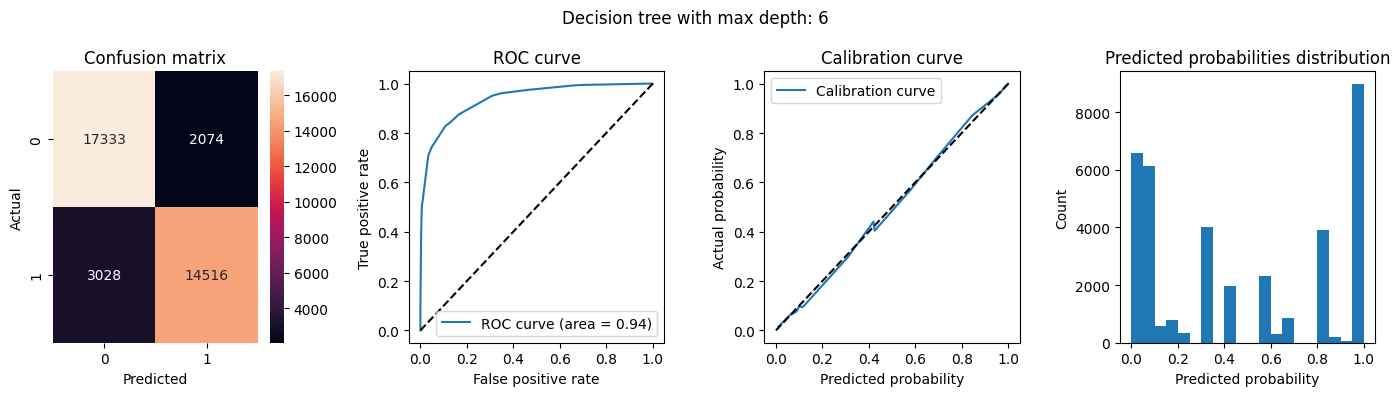

Training loss: 0.1467
Accuracy: 0.9049
Precision: 0.9282
Recall: 0.8668
F1: 0.8964
ROC AUC: 0.9616


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\4115213507.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


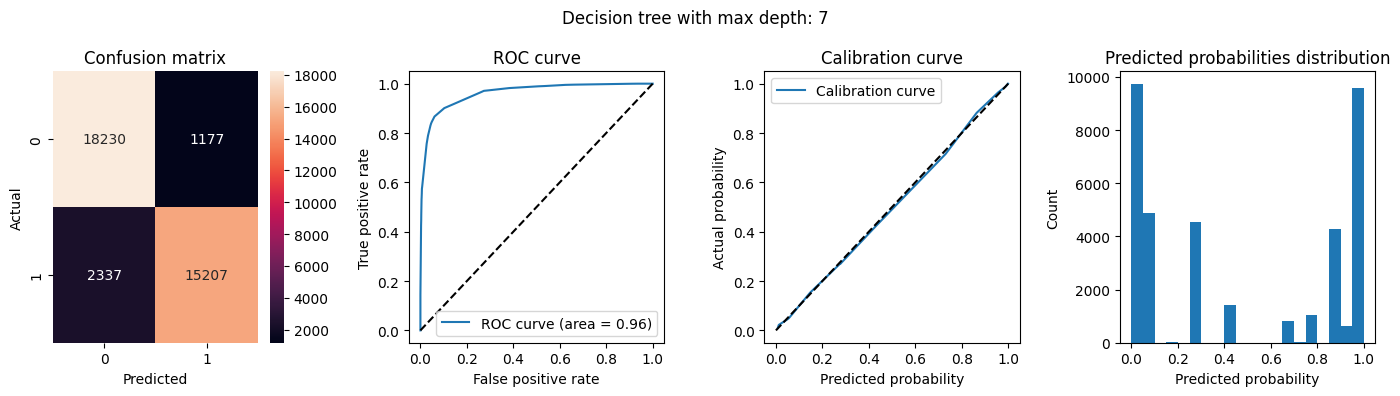

In [10]:
for d in range(3, 8):
    model = DecisionTreeClassifier(random_state=42, max_depth=d)
    model.fit(X_train, y_train)

    # Predict probability estimates for ROC AUC and ROC curve
    y_proba = model.predict_proba(X_test)[: ,1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, np.round(y_proba))
    precision = precision_score(y_test, np.round(y_proba))
    recall = recall_score(y_test, np.round(y_proba))
    f1 = f1_score(y_test, np.round(y_proba))
    conf_matrix = confusion_matrix(y_test, np.round(y_proba))
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    loss = np.mean(np.abs(y_test - y_proba))

    # Print metrics
    print("Training loss: {:.4f}".format(loss))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1: {:.4f}".format(f1))
    print("ROC AUC: {:.4f}".format(roc_auc))

    # Plot confusion matrix and ROC curve
    fig, axs = plt.subplots(1, 4, figsize=(14, 4))
    fig.suptitle(f"Decision tree with max depth: {d}")

    # Confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
    axs[0].set_title("Confusion matrix")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Actual")

    # ROC curve
    axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axs[1].plot([0, 1], [0, 1], 'k--')
    axs[1].set_title("ROC curve")
    axs[1].set_xlabel("False positive rate")
    axs[1].set_ylabel("True positive rate")
    axs[1].legend()

    # Model calibration
    calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
    calibration['bucket'] = pd.qcut(calibration['predicted'], 20, duplicates="drop")
    calibration = calibration.groupby('bucket').mean().reset_index()

    axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
    axs[2].plot([0, 1], [0, 1], 'k--')
    axs[2].set_title("Calibration curve")
    axs[2].set_xlabel("Predicted probability")
    axs[2].set_ylabel("Actual probability")
    axs[2].legend()

    axs[3].hist(y_proba, bins=20)
    axs[3].set_title("Predicted probabilities distribution")
    axs[3].set_xlabel("Predicted probability")
    axs[3].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

Training loss: 0.2910
Accuracy: 0.7988
Precision: 0.8210
Recall: 0.7371
F1: 0.7768
ROC AUC: 0.8661


C:\Users\szmid\AppData\Local\Temp\ipykernel_29312\3796440291.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


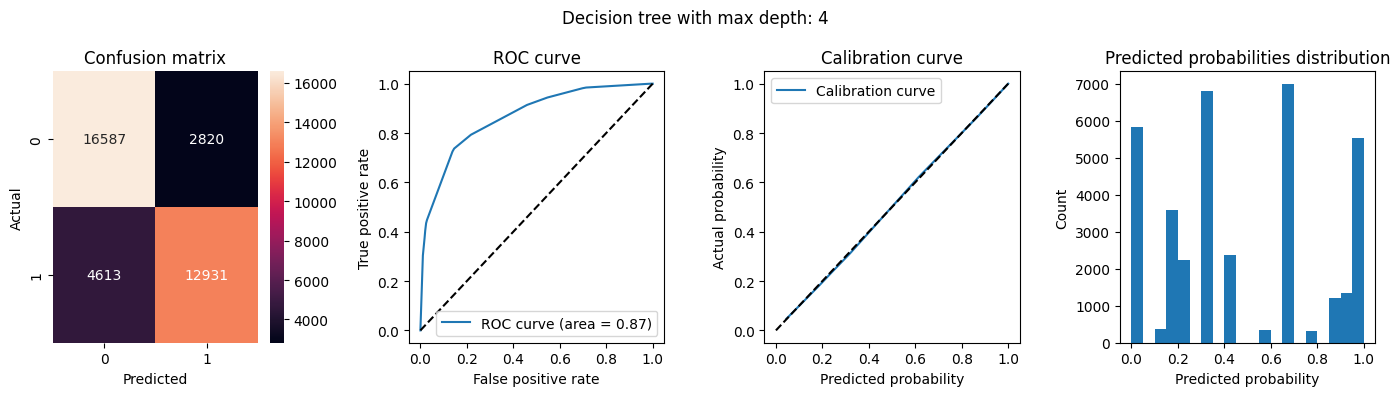

In [19]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

# Predict probability estimates for ROC AUC and ROC curve
y_proba = model.predict_proba(X_test)[: ,1]

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_proba))
precision = precision_score(y_test, np.round(y_proba))
recall = recall_score(y_test, np.round(y_proba))
f1 = f1_score(y_test, np.round(y_proba))
conf_matrix = confusion_matrix(y_test, np.round(y_proba))
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
loss = np.mean(np.abs(y_test - y_proba))

# Print metrics
print("Training loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))

# Plot confusion matrix and ROC curve
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
fig.suptitle(f"Decision tree with max depth: 4")

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC curve
axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend()

# Model calibration
calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
calibration['bucket'] = pd.qcut(calibration['predicted'], 10, duplicates="drop")
calibration = calibration.groupby('bucket').mean().reset_index()

axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title("Calibration curve")
axs[2].set_xlabel("Predicted probability")
axs[2].set_ylabel("Actual probability")
axs[2].legend()

axs[3].hist(y_proba, bins=20)
axs[3].set_title("Predicted probabilities distribution")
axs[3].set_xlabel("Predicted probability")
axs[3].set_ylabel("Count")

plt.tight_layout()
plt.show()

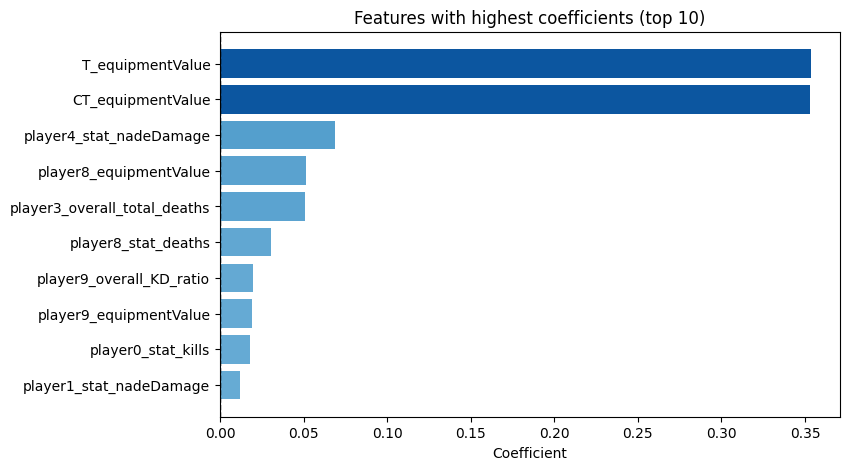

In [20]:
positive = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1).head(50)

pos_feature_names = feature_coefficients['Feature_pos'].iloc[:10].values

pos_feature_coef = []

for idx in range(0,10):
    pos_feature_coef.append(feature_coefficients['Importance_pos'].iloc[idx])


# Plot
pos_cmap = plt.cm.Blues
norm_pos = Normalize(-0.5, 0.5)
pos_colors = [pos_cmap(norm_pos(coef)) for coef in pos_feature_coef]

fig, axs = plt.subplots(figsize=(8, 5))
axs.barh(pos_feature_names, pos_feature_coef, color=pos_colors)

axs.axvline(x=0, color='black', linestyle='dashed', linewidth=1)

axs.set_xlabel('Coefficient')
axs.set_title('Features with highest coefficients (top 10)')
axs.invert_yaxis()

plt.show()

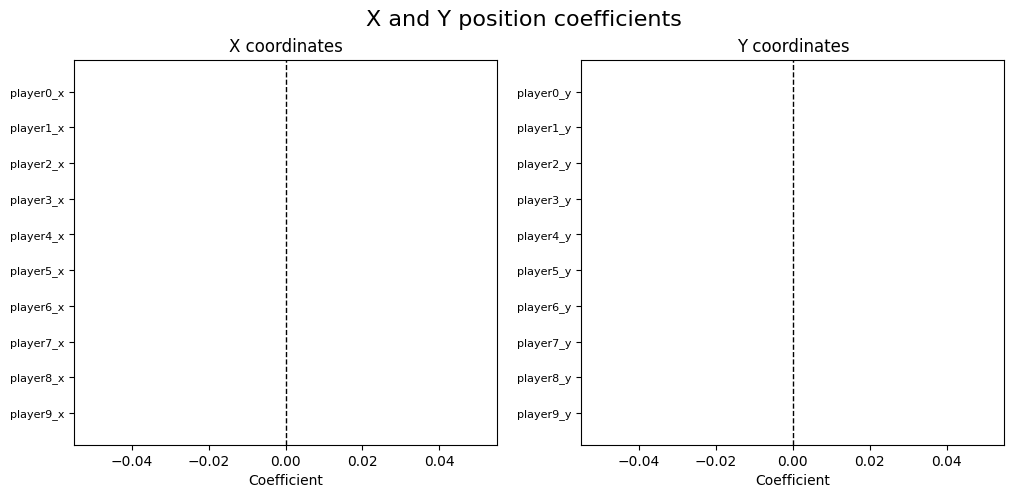

In [21]:
positive = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

x_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_x')].sort_values(by=['Feature_pos'])['Feature_pos']
y_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_y')].sort_values(by=['Feature_pos'])['Feature_pos']

x_feature_coef = []
y_feature_coef = []

x_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_x')]
y_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_y')]

for idx in range(0,10):
    x_feature_coef.append(x_data['Importance_pos'].iloc[idx])
    y_feature_coef.append(y_data['Importance_pos'].iloc[idx])


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('X and Y position coefficients', fontsize=16)

axs[0].barh(x_feature_names, x_feature_coef)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(x_feature_names, x_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('X coordinates')
axs[0].invert_yaxis()

axs[1].barh(y_feature_names, y_feature_coef)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(y_feature_names, y_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('Y coordinates')
axs[1].invert_yaxis()

plt.show()

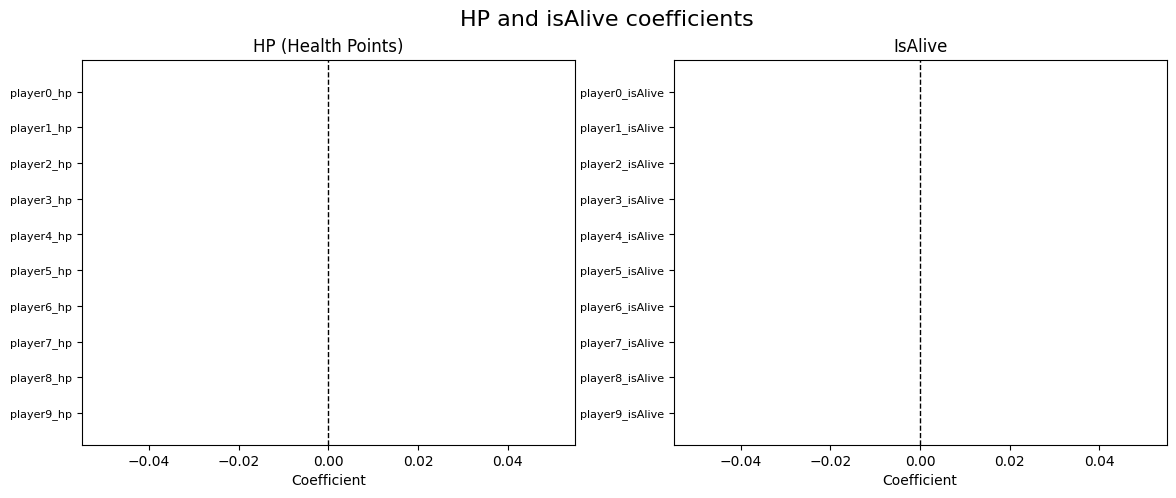

In [22]:
positive = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.feature_importances_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
feature_coefficients = pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)

isAlive_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')].sort_values(by=['Feature_pos'])['Feature_pos']
hp_feature_names = feature_coefficients.loc[feature_coefficients['Feature_pos'].str.contains('_hp')].sort_values(by=['Feature_pos'])['Feature_pos']

isAlive_feature_coef = []
hp_feature_coef = []

isAlive_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_isAlive')]
hp_data = feature_coefficients.sort_values(by=['Feature_pos']).loc[feature_coefficients['Feature_pos'].str.contains('_hp')]

for idx in range(0,10):
    isAlive_feature_coef.append(x_data['Importance_pos'].iloc[idx])
    hp_feature_coef.append(y_data['Importance_pos'].iloc[idx])

# Replace NaN values with 0
isAlive_feature_coef = [0 if coef == None else coef for coef in x_feature_coef]
hp_feature_coef = [0 if coef == None else coef for coef in y_feature_coef]

# Plot
isAlive_cmap = plt.cm.Reds
hp_cmap = plt.cm.Blues

norm_isAlive = Normalize(min(isAlive_feature_coef), max(isAlive_feature_coef))
norm_hp = Normalize(-5, 4)

isAlive_colors = [isAlive_cmap(norm_isAlive(coef)) for coef in isAlive_feature_coef][::-1]
hp_colors = [hp_cmap(norm_hp(coef)) for coef in hp_feature_coef][::-1]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('HP and isAlive coefficients', fontsize=16)

axs[0].barh(hp_feature_names, hp_feature_coef, color=hp_colors)
axs[0].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[0].set_yticks(hp_feature_names, hp_feature_names,  fontsize=8)
axs[0].set_xlabel('Coefficient')
axs[0].set_title('HP (Health Points)')
axs[0].invert_yaxis()

axs[1].barh(isAlive_feature_names, isAlive_feature_coef, color=isAlive_colors)
axs[1].axvline(x=0, color='black', linestyle='dashed', linewidth=1)
axs[1].set_yticks(isAlive_feature_names, isAlive_feature_names,  fontsize=8)
axs[1].set_xlabel('Coefficient')
axs[1].set_title('IsAlive')
axs[1].invert_yaxis()

plt.show()

#### *Testing the model*

In [23]:
test = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_21.csv')

# --------------------------------------------------------------------------------------------------------
# IMPORTANT: The datasets used in this loop might not be available on drive due to their size.
#            However, the codes below can be run on 'available-datasets only' as well, 
#            but will likely leed to a different result (as the dataset is smaller).
# --------------------------------------------------------------------------------------------------------
for i in range(22, 26):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    test = pd.concat([test, temp])

test = test.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                          'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                          'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

Test loss: 0.36
Accuracy: 0.66
Precision: 0.59
Recall: 0.70
F1: 0.64
ROC AUC: 0.66


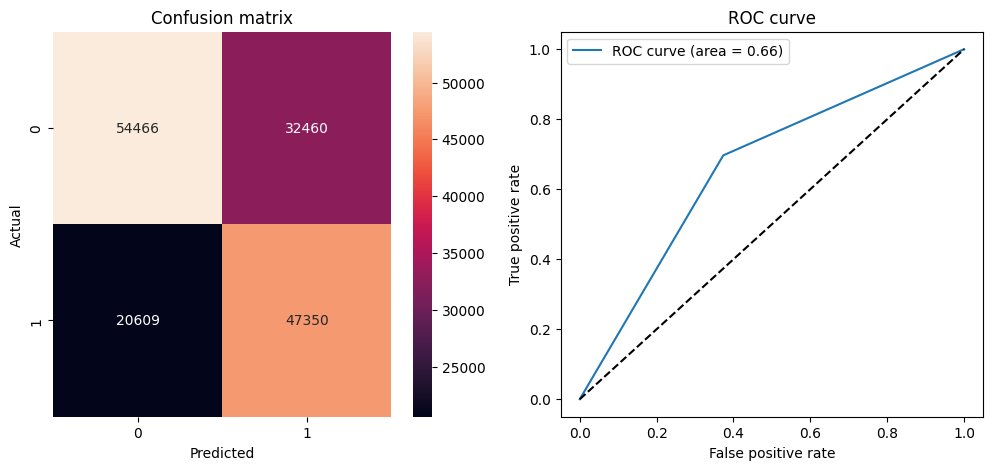

In [25]:
test_X = test.drop(columns=['CT_winsRound']).fillna(0)
test_y = test['CT_winsRound']

test_y_pred = model.predict_proba(test_X)[: ,1]

test_accuracy = accuracy_score(test_y, np.round(test_y_pred))
test_precision = precision_score(test_y, np.round(test_y_pred))
test_recall = recall_score(test_y, np.round(test_y_pred))
test_f1 = f1_score(test_y, np.round(test_y_pred))
test_conf_matrix = confusion_matrix(test_y, np.round(test_y_pred))
test_roc_auc = roc_auc_score(test_y, np.round(test_y_pred))
test_fpr, test_tpr, _ = roc_curve(test_y, np.round(test_y_pred))
test_roc_auc = auc(test_fpr, test_tpr)
test_loss = np.mean(np.abs(test_y - test_y_pred))

print("Test loss: {:.2f}".format(test_loss))
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1: {:.2f}".format(test_f1))
print("ROC AUC: {:.2f}".format(test_roc_auc))

fig, axs = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[1].plot(test_fpr, test_tpr, label='ROC curve (area = {:.2f})'.format(test_roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend();



## II. IV. Blackbox model

Read the dataset

In [106]:
file_name = "1000-1001-1002-1003-1004-1005-1006-1007-1008-1009-1010-1011-1012-1013-1014-1015-1016-1017-1018-1019-1020-1021-1022-1023-1024-1025-1026-1027-1028-1029-1030-1031.pt"
dataset = torch.load(PATH_GRAPH_DATA + file_name)
print("dataset_1 loaded")

dataset_1 loaded


Shuffle graphs

In [107]:
torch.manual_seed(42)
shuffled_dataset = dataset[torch.randperm(len(dataset))]
shuffled_dataset

InfernoDataset(173868)

Heterogeneous GNN model

In [108]:
class HeterogeneousGNN(torch.nn.Module):

    def __init__(self, hidden_channels, conv_layers, dense_layers, edge_types):
        super().__init__()

        torch.manual_seed(42)

        self.convs = torch.nn.ModuleList()
        for layernum in range(conv_layers):
            conv = HeteroConv({
                    edge_type: SAGEConv((-1, -1), hidden_channels)
                    for edge_type in edge_types
                }, aggr='mean')
            self.convs.append(conv)

        self.linear = Linear(-1, dense_layers[0]['input_neuron_num'])
        
        # Create dense layers based on the 'dense_layers' parameter
        dense_layers_container = []
        for layer_config in dense_layers:

            if layer_config['dropout'] == 0:
                # Add the first layer manually because it has a different input size
                dense_layers_container.append(torch.nn.Linear(layer_config['input_neuron_num'], layer_config['neuron_num']))
                
                # Add activation function if it is not None - the last layer does not have sigmoid activation function because of the BCEWithLogitsLoss
                if layer_config['activation_function'] is not None:
                    dense_layers_container.append(layer_config['activation_function'])

                # Add the rest of the layers (if there are any)
                for _ in range(layer_config['num_of_layers'] - 1):
                    dense_layers_container.append(torch.nn.Linear(layer_config['neuron_num'], layer_config['neuron_num']))

                    # Add activation function if it is not None - the last layer does not have sigmoid activation function because of the BCEWithLogitsLoss
                    if layer_config['activation_function'] is not None:
                        dense_layers_container.append(layer_config['activation_function'])
            else:
                dense_layers_container.append(torch.nn.Dropout(layer_config['dropout']))
        
        self.dense = torch.nn.Sequential(*dense_layers_container)
        

    def forward(self, x_dict, edge_index_dict, y):
      graph_data = torch.tensor([
          y['time_remaining'],
          y['tScore'],
          y['ctScore'],
          y['CT_aliveNum'],
          y['T_aliveNum'],
          y['CT_equipmentValue'],
          y['T_equipmentValue'],
          y['is_bomb_being_planted'],
          y['is_bomb_planted_at_A_site'],
          y['is_bomb_planted_at_B_site'],
          y['is_bomb_being_defused'],
          y['bomb_mx_pos1'],
          y['bomb_mx_pos2'],
          y['bomb_mx_pos3'],
          y['bomb_mx_pos4'],
          y['bomb_mx_pos5'],
          y['bomb_mx_pos6'],
          y['bomb_mx_pos7'],
          y['bomb_mx_pos8'],
          y['bomb_mx_pos9'],
      ]).to('cuda')

      edge_index_dict = {key: value.to(torch.int64) for key, value in edge_index_dict.items()}

      for conv in self.convs:
          temp = conv(x_dict, edge_index_dict)
          x_dict['map'] = torch.cat([x_dict['map'][:,:5],temp['map']],dim=1)
          x_dict = {key: x.relu() for key, x in x_dict.items()}

      # With flattem
      x = torch.cat([torch.flatten(x_dict['player']), torch.flatten(x_dict['map']), torch.flatten(graph_data)])
      x_raw = x

      # Global mean pool
      #one = global_mean_pool(x_dict['player'],None)
      #two = global_mean_pool(x_dict['map'], None)
      #x = torch.cat([torch.flatten(x_dict['player']), torch.flatten(two)])

      x = self.linear(x)
      x = self.dense(x)
      return x, x_raw

dense_layers = [
    {
        "dropout": 0,
        "num_of_layers": 3,
        "input_neuron_num": 2048,
        "neuron_num": 2048,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 3,
        "input_neuron_num": 2048,
        "neuron_num": 512,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 2,
        "input_neuron_num": 512,
        "neuron_num": 64,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "input_neuron_num": 64,
        "neuron_num": 16,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "input_neuron_num": 16,
        "neuron_num": 4,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "input_neuron_num": 4,
        "neuron_num": 1,
        "activation_function": None
    },
]
model = HeterogeneousGNN(hidden_channels=30, conv_layers=10, dense_layers=dense_layers, edge_types=shuffled_dataset[0].edge_types)

In [109]:
train_loader = DataLoader(shuffled_dataset[:20000], batch_size=1, shuffle=False)
val_loader = DataLoader(shuffled_dataset[20000:30000], batch_size=1, shuffle=False)
test_loader = DataLoader(shuffled_dataset[30000:40000], batch_size=1, shuffle=False)

dense_layers = [
    {
        "dropout": 0,
        "num_of_layers": 2,
        "neuron_num": 2048,
        "input_neuron_num": 2048,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "neuron_num": 512,
        "input_neuron_num": 2048,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "neuron_num": 512,
        "input_neuron_num": 512,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.4,
    },
    {
        "dropout": 0,
        "num_of_layers": 2,
        "neuron_num": 64,
        "input_neuron_num": 512,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0.5,
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "neuron_num": 16,
        "input_neuron_num": 64,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "neuron_num": 4,
        "input_neuron_num": 16,
        "activation_function": torch.nn.LeakyReLU()
    },
    {
        "dropout": 0,
        "num_of_layers": 1,
        "neuron_num": 1,
        "input_neuron_num": 4,
        "activation_function": None
    },
]

model = HeterogeneousGNN(hidden_channels=15, conv_layers=10, dense_layers=dense_layers, edge_types=shuffled_dataset[0].edge_types).to('cuda')
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.025)
loss_function = torch.nn.BCEWithLogitsLoss()


with torch.no_grad():  # Initialize lazy modules.
     data = shuffled_dataset[0].to('cuda')
     out, x_raw = model(data.x_dict, data.edge_index_dict, data.y)
     print(torch.sigmoid(out))

     
print('params:', sum(p.numel() for p in model.parameters()))
print('trainable:', sum(p.numel() for p in model.parameters() if p.requires_grad))

tensor([0.3612], device='cuda:0')
params: 19415356
trainable: 19415356


Train, validation and test functions

In [110]:
def epoch_result_visualization(
    epochs,
    epoch,
    epoch_start,
    epoch_start_time,
    epoch_end,
    epoch_end_time,
    train_avg_loss,
    val_metrics,
    train_losses,
    val_losses, 
    accuracies, 
    precisions, 
    recalls, 
    f1_scores
):
    val_avg_loss = val_metrics[0]
    accuracy = val_metrics[1]
    precision = val_metrics[2]
    recall = val_metrics[3]
    f1 = val_metrics[4]
    cm = val_metrics[5]
    cm_normalized = val_metrics[6]
    fpr, tpr = val_metrics[7], val_metrics[8]

    print("-------------------------------------------------------------------------------------------\n"
         f"                                     Epoch {epoch}\n"
          "-------------------------------------------------------------------------------------------\n"
         f"Device: {torch.cuda.get_device_name(0)} \n"
          "Time: \n"
         f"   -Start time: {epoch_start_time} \n"
         f"   -End time: {epoch_end_time}s \n"
         f"   -Duration: {epoch_end - epoch_start}s \n"
          ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n"
          "Training results:\n"
         f"   - Average loss: {train_avg_loss:.4f} \n"
          ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n"
          "Validation results: \n"
         f"   - Average loss: {val_avg_loss} \n"
         f"   - Accuracy: {accuracy} \n"
         f"   - Precision: {precision} \n"
         f"   - Recall: {recall} \n"
         f"   - F1: {f1} \n"
          "   - Confusion matrix & ROC/AUC\n"
          ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n")
    
    # ----------------------------------------
    # Confusion matrix & ROC/AUC visualization
    # ----------------------------------------

    fig, axs = plt.subplots(1, 3, figsize=(8, 3))
    fig.suptitle(f'Epoch {epoch} - Validation scores', fontsize=12)


    # Confusion Matrix
    im = axs[0].matshow(cm, cmap='Blues', alpha=0.6)
    axs[0].set_aspect('equal')
    axs[0].set_title('Confusion matrix', fontsize=10, y=1)
    axs[0].set_xlabel('Predicted', fontsize=8)
    axs[0].set_ylabel('Actual', fontsize=8)
    # Add numbers to the confusion matrix
    for (i, j), val in np.ndenumerate(cm):
        axs[0].text(j, i, f'{val}', ha='center', va='center', fontsize=10, color='black')
    # Set x-ticks to bottom
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels([0, 1])
    axs[0].tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)


    # Normalized Confusion Matrix
    im = axs[1].matshow(cm_normalized, cmap='Blues', alpha=0.6)
    axs[1].set_aspect('equal')
    axs[1].set_title('Normalized confusion matrix', fontsize=10, y=1)
    axs[1].set_xlabel('Predicted', fontsize=8)
    # Add numbers to the normalized confusion matrix
    for (i, j), val in np.ndenumerate(cm_normalized):
        axs[1].text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=10, color='black')
    # Set x-ticks to bottom
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels([0, 1])
    axs[1].tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)


    # ROC/AUC Curve
    axs[2].plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % auc(fpr, tpr))
    axs[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('False Positive Rate', fontsize=8)
    axs[2].set_ylabel('True Positive Rate', fontsize=8)
    axs[2].set_title('ROC/AUC Curve', fontsize=10, y=1)
    axs[2].legend(loc="lower right", fontsize=8)
    axs[2].set_aspect('equal')


    plt.tight_layout()
    plt.show()



    # ----------------------------------------
    # Metrics visualization
    # ----------------------------------------

    fig, axs = plt.subplots(2, 3, figsize=(8, 4.5))
    fig.suptitle('Training and Validation Metrics Over Epochs', fontsize=12)

    epochs_range = np.arange(0, epoch + 1)

    def plot_metric(ax, data, title, ylabel, color):
        if len(data) == 1:
            ax.scatter(epochs_range, data, s=10, c=color)
        else:
            ax.plot(epochs_range, data, marker='o', linestyle='-', color=color)
        ax.set_title(title, fontsize=10)
        ax.set_xlabel('Epoch', fontsize=8)
        ax.set_ylabel(ylabel, fontsize=8)
        ax.set_xticks(epochs_range)
        ax.set_xlim(-1, epochs)
        if 'Loss' not in title:
            ax.set_ylim(0, 1)
        ax.grid(True)

    plot_metric(axs[0, 0], train_losses, 'Train Loss', 'Loss', 'cornflowerblue')
    plot_metric(axs[0, 1], val_losses, 'Validation Loss', 'Loss', 'darkorange')
    plot_metric(axs[0, 2], accuracies, 'Accuracy', 'Accuracy', 'limegreen')
    plot_metric(axs[1, 0], precisions, 'Precision', 'Precision', 'red')
    plot_metric(axs[1, 1], recalls, 'Recall', 'Recall', 'teal')
    plot_metric(axs[1, 2], f1_scores, 'F1 Score', 'F1 Score', 'black')

    plt.tight_layout()
    plt.show()



def train(epochs):

    torch.cuda.empty_cache()

    train_losses = []
    val_losses = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    convolved_data = []

    for epoch in range(epochs):

        epoch_start = time.time()
        epoch_start_time = time.asctime(time.localtime()) 
        model.train()
        total_loss = 0
        
        for data in train_loader:  # Iterate in batches over the training dataset.
            data = data.to('cuda')
            optimizer.zero_grad()  # Clear gradients.
            
            out, x_raw = model(data.x_dict, data.edge_index_dict, data.y)
            out = out.float()
            target = torch.tensor(data.y['CT_winsRound']).float().to('cuda')  # Assuming target is stored in data.y

            is_last_epoch = epoch == epochs - 1

            if is_last_epoch:
                convolved_data.append(x_raw.cpu().detach().numpy())

            loss = loss_function(out, target)  # Compute the loss.
            loss.backward()  # Backpropagate.
            optimizer.step()  # Update model parameters.

            total_loss += loss.item()  # Accumulate the loss.


        train_avg_loss = total_loss / len(train_loader)
        val_metrics = validate(val_loader, is_last_epoch)  # Validate the model on validation dataset.

        torch.save(model, PATH_MODELS + f'/tai/heterogeneous-gnn-{epoch}.pt')

        epoch_end = time.time()
        epoch_end_time = time.asctime(time.localtime()) 

        val_avg_loss = val_metrics[0]
        accuracy = val_metrics[1]
        precision = val_metrics[2]
        recall = val_metrics[3]
        f1 = val_metrics[4]

        train_losses.append(train_avg_loss)
        val_losses.append(val_avg_loss)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        epoch_result_visualization(epochs, epoch, epoch_start, epoch_start_time, epoch_end, epoch_end_time, train_avg_loss, val_metrics, train_losses, val_losses, accuracies, precisions, recalls, f1_scores)

    return convolved_data, val_metrics[-1]
        


def validate(val_loader, is_last_epoch):
    model.eval()  # Switch to evaluation mode.
    total_loss = 0
    total_samples = 0
    predictions_all = []
    targets_all = []

    conv_data = []

    with torch.no_grad():
        for data in val_loader:  # Iterate in batches over the validation dataset.
            data = data.to('cuda')

            out, x_raw = model(data.x_dict, data.edge_index_dict, data.y)
            out = out.float()
            target = torch.tensor(data.y['CT_winsRound']).float().to('cuda')

            if is_last_epoch:
                conv_data.append(x_raw.cpu().detach().numpy())

            loss = loss_function(out, target)
            total_loss += loss.item()
            total_samples += len(target)

            # Get the predictions
            predictions = (torch.sigmoid(out) > 0.5).float()

            predictions_all.extend(predictions.cpu().numpy())
            targets_all.extend(target.cpu().numpy())

    # Calculate performance metrics
    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(targets_all, predictions_all)
    precision = precision_score(targets_all, predictions_all)
    recall = recall_score(targets_all, predictions_all)
    f1 = f1_score(targets_all, predictions_all)
    cm = confusion_matrix(targets_all, predictions_all)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fpr, tpr, _ = roc_curve(targets_all, predictions_all)

    return avg_loss, accuracy, precision, recall, f1, cm, cm_normalized, fpr, tpr, conv_data



def test(test_loader):
    model.eval()  # Switch to evaluation mode.
    total_loss = 0
    total_samples = 0
    predictions_all = []
    targets_all = []

    conv_data = []

    with torch.no_grad():
        for data in test_loader:  # Iterate in batches over the test dataset.
            data = data.to('cuda')

            out, x_raw = model(data.x_dict, data.edge_index_dict, data.y)
            out = out.float()
            target = torch.tensor(data.y['CT_winsRound']).float().to('cuda')

            conv_data.append(x_raw.cpu().detach().numpy())

            loss = loss_function(out, target)
            total_loss += loss.item()
            total_samples += len(target)

            # Get the predictions
            predictions = (torch.sigmoid(out) > 0.5).float()

            predictions_all.extend(predictions.cpu().numpy())
            targets_all.extend(target.cpu().numpy())

    # Calculate performance metrics
    avg_loss = total_loss / len(test_loader)
    accuracy = accuracy_score(targets_all, predictions_all)
    precision = precision_score(targets_all, predictions_all)
    recall = recall_score(targets_all, predictions_all)
    f1 = f1_score(targets_all, predictions_all)
    cm = confusion_matrix(targets_all, predictions_all)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fpr, tpr, _ = roc_curve(targets_all, predictions_all)

    print("-------------------------------------------------------------------------------------------\n"
          "                                      Test Results\n"                                     
          "-------------------------------------------------------------------------------------------\n"
         f"Average loss: {avg_loss} \n"
         f"Accuracy: {accuracy} \n"
         f"Precision: {precision} \n"
         f"Recall: {recall} \n"
         f"F1: {f1} \n"
          "Confusion matrix & ROC/AUC\n"
          ". . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n")

    fig, axs = plt.subplots(1, 3, figsize=(8, 3))
    fig.suptitle('Test results', fontsize=12)

    # Confusion Matrix
    im = axs[0].matshow(cm, cmap='Blues', alpha=0.6)
    axs[0].set_aspect('equal')
    axs[0].set_title('Confusion matrix', fontsize=10, y=1)
    axs[0].set_xlabel('Predicted', fontsize=8)
    axs[0].set_ylabel('Actual', fontsize=8)
    for (i, j), val in np.ndenumerate(cm):
        axs[0].text(j, i, f'{val}', ha='center', va='center', fontsize=10, color='black')
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels([0, 1])
    axs[0].tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)

    # Normalized Confusion Matrix
    im = axs[1].matshow(cm_normalized, cmap='Blues', alpha=0.6)
    axs[1].set_aspect('equal')
    axs[1].set_title('Normalized confusion matrix', fontsize=10, y=1)
    axs[1].set_xlabel('Predicted', fontsize=8)
    for (i, j), val in np.ndenumerate(cm_normalized):
        axs[1].text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=10, color='black')
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels([0, 1])
    axs[1].tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)

    # ROC/AUC Curve
    axs[2].plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % auc(fpr, tpr))
    axs[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('False Positive Rate', fontsize=8)
    axs[2].set_ylabel('True Positive Rate', fontsize=8)
    axs[2].set_title('ROC/AUC Curve', fontsize=10, y=1)
    axs[2].legend(loc="lower right", fontsize=8)
    axs[2].set_aspect('equal')

    plt.tight_layout()
    plt.show()

    return avg_loss, accuracy, precision, recall, f1, cm, cm_normalized, fpr, tpr, conv_data



Train model

-------------------------------------------------------------------------------------------
                                     Epoch 0
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Fri May 24 23:35:01 2024 
   -End time: Fri May 24 23:44:30 2024s 
   -Duration: 568.9675254821777s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.5733 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.4454845476043535 
   - Accuracy: 0.7904 
   - Precision: 0.8289651445555255 
   - Recall: 0.6771132200397263 
   - F1: 0.7453838678328474 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



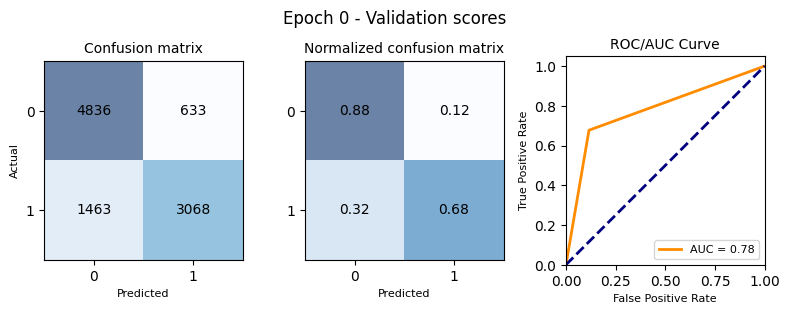

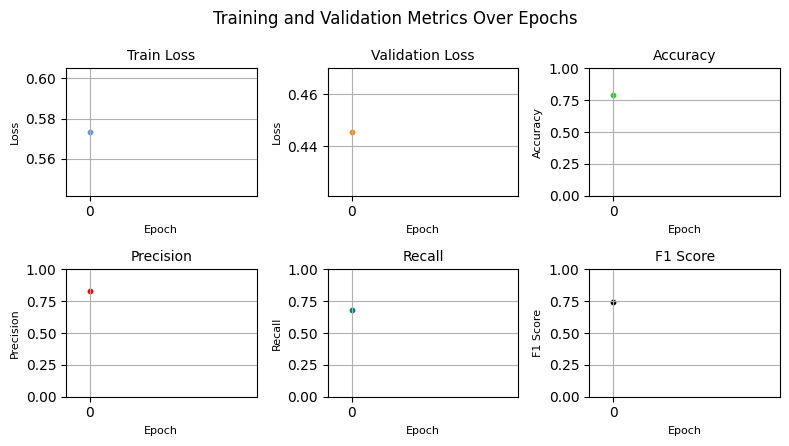

-------------------------------------------------------------------------------------------
                                     Epoch 1
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Fri May 24 23:44:31 2024 
   -End time: Fri May 24 23:53:43 2024s 
   -Duration: 552.4554681777954s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.4312 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.44412020326536794 
   - Accuracy: 0.7613 
   - Precision: 0.9777183600713012 
   - Recall: 0.4842198190244979 
   - F1: 0.6476752767527676 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



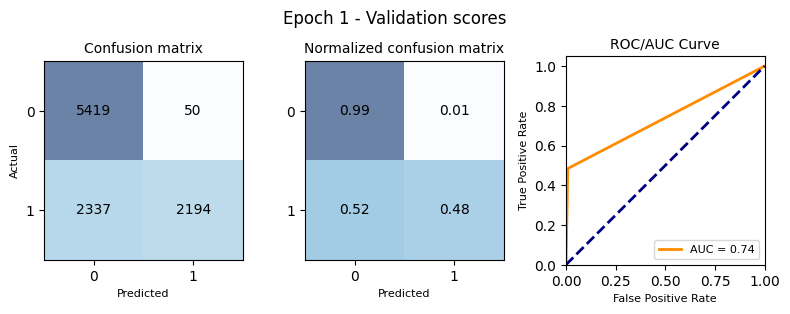

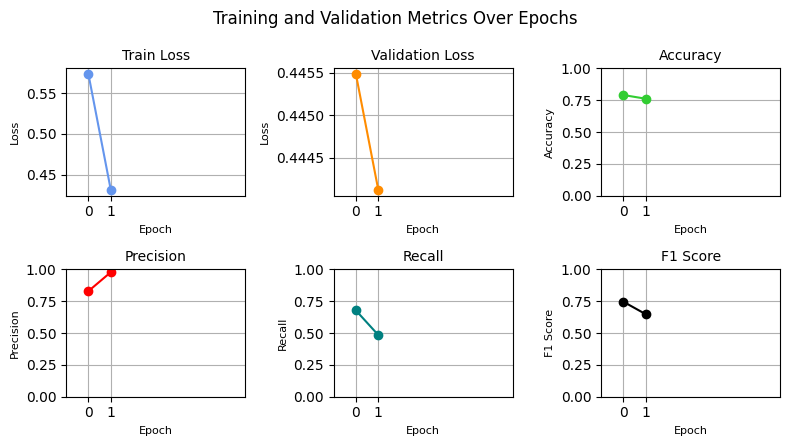

-------------------------------------------------------------------------------------------
                                     Epoch 2
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Fri May 24 23:53:43 2024 
   -End time: Sat May 25 00:03:12 2024s 
   -Duration: 569.0453901290894s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.3694 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.3757921269018919 
   - Accuracy: 0.7839 
   - Precision: 0.9762861736334405 
   - Recall: 0.5360847495034209 
   - F1: 0.6921213848126514 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



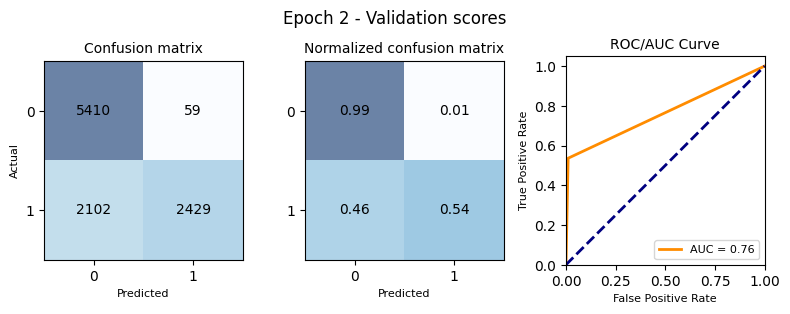

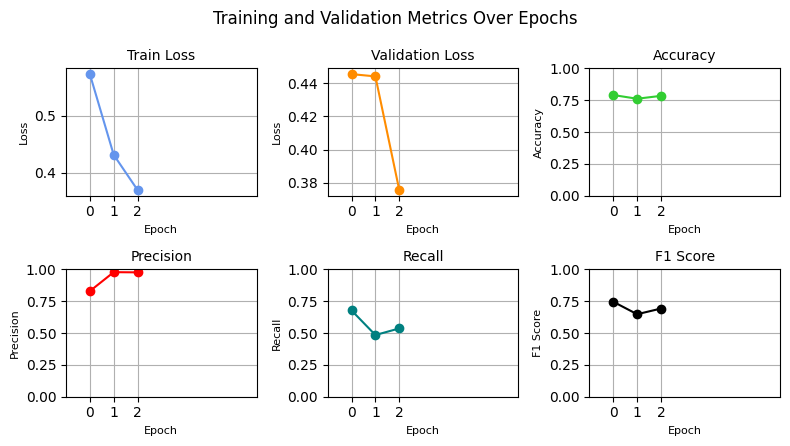

-------------------------------------------------------------------------------------------
                                     Epoch 3
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Sat May 25 00:03:13 2024 
   -End time: Sat May 25 00:12:26 2024s 
   -Duration: 552.9988763332367s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.3284 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.3282041342605143 
   - Accuracy: 0.8093 
   - Precision: 0.9753623188405797 
   - Recall: 0.5941293312734496 
   - F1: 0.7384446577972844 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



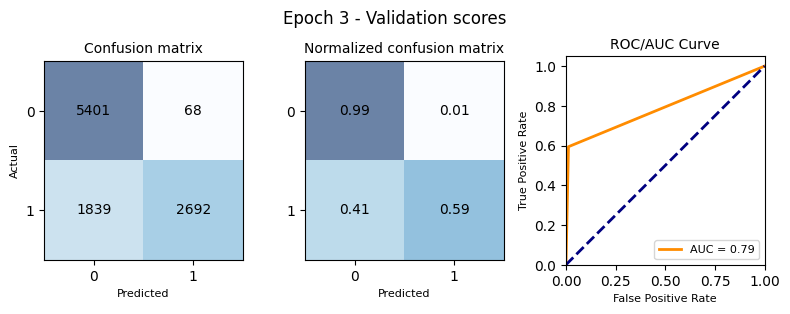

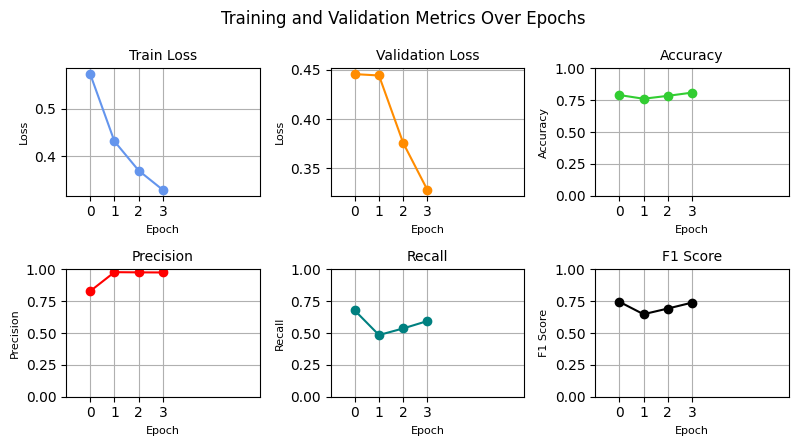

-------------------------------------------------------------------------------------------
                                     Epoch 4
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Sat May 25 00:12:26 2024 
   -End time: Sat May 25 00:21:41 2024s 
   -Duration: 554.2724173069s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.3120 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.40771369328869306 
   - Accuracy: 0.8375 
   - Precision: 0.7734286789612345 
   - Recall: 0.9070845288015891 
   - F1: 0.834941594718131 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



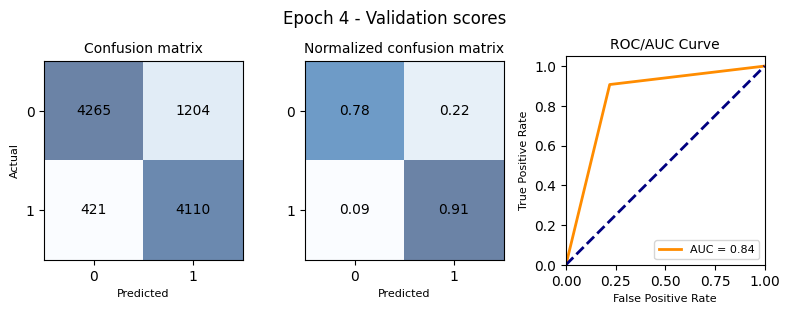

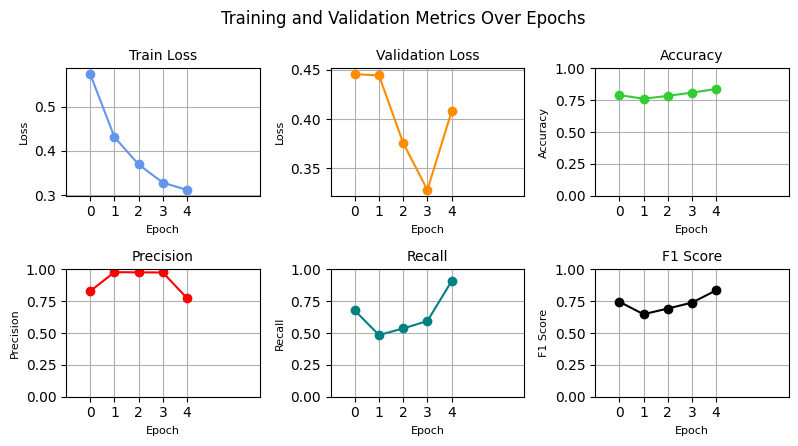

-------------------------------------------------------------------------------------------
                                     Epoch 5
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Sat May 25 00:21:41 2024 
   -End time: Sat May 25 00:30:56 2024s 
   -Duration: 555.0665335655212s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.2849 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.3610912892973117 
   - Accuracy: 0.8531 
   - Precision: 0.9160326086956522 
   - Recall: 0.7439858750827631 
   - F1: 0.8210936548532456 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



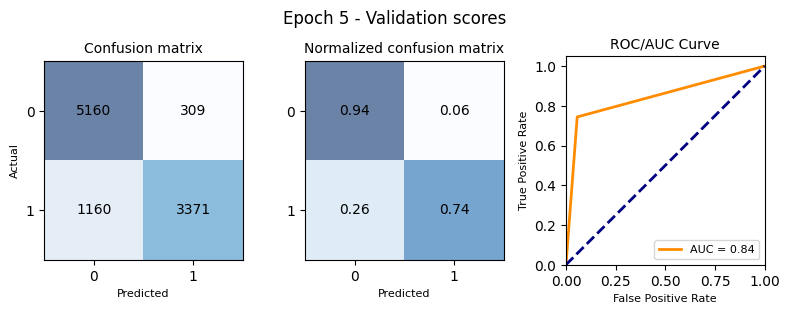

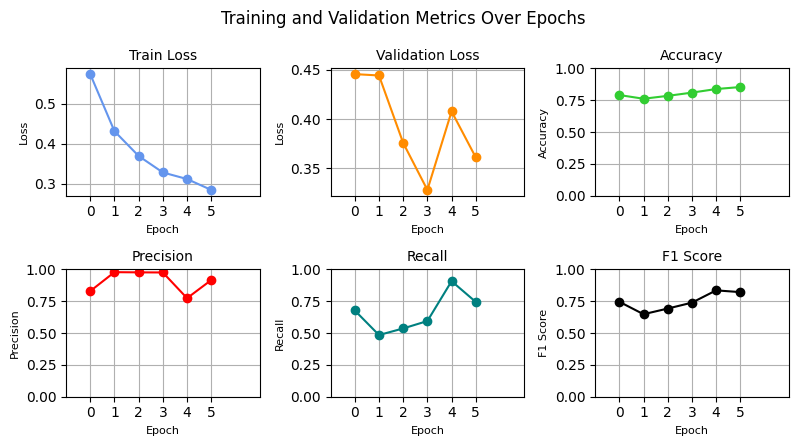

-------------------------------------------------------------------------------------------
                                     Epoch 6
-------------------------------------------------------------------------------------------
Device: NVIDIA GeForce RTX 4070 Laptop GPU 
Time: 
   -Start time: Sat May 25 00:30:57 2024 
   -End time: Sat May 25 00:40:23 2024s 
   -Duration: 566.4461269378662s 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Training results:
   - Average loss: 0.2661 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Validation results: 
   - Average loss: 0.3563301941182782 
   - Accuracy: 0.8105 
   - Precision: 0.9827838827838827 
   - Recall: 0.5921430147870227 
   - F1: 0.7390166643712986 
   - Confusion matrix & ROC/AUC
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



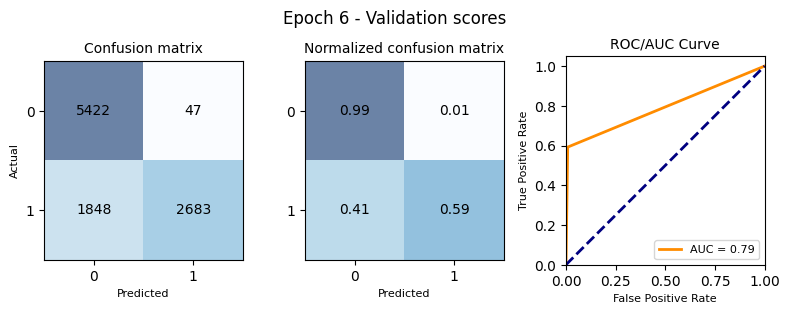

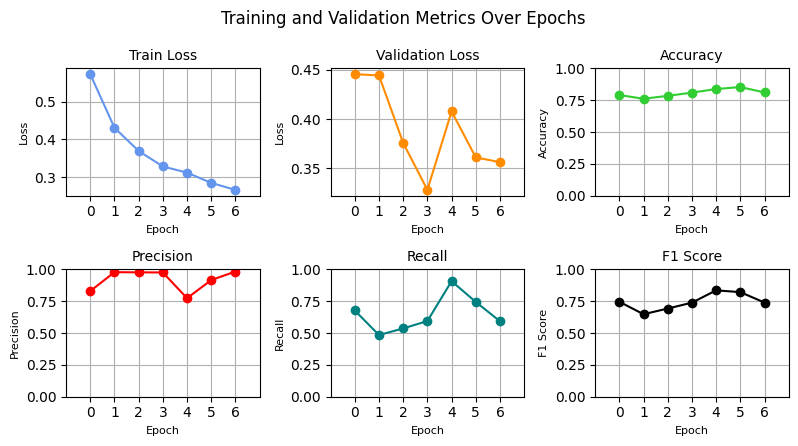

In [111]:
conv_data = train(epochs=7)